In [1]:
import pandas as pd
import scipy.stats as sps
import numpy as np
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import io
import time
import datetime
import time
plt.style.use("ggplot")

In [146]:
data = pd.read_csv('Applications_Data_with_all_features.csv')

In [147]:
#Preprocessing
data['date'] = pd.to_datetime(data['date'], format = "%Y-%m-%d")
data['dob'] = pd.to_datetime(data['dob'], format = "%Y-%m-%d")
for col in ['record', 'ssn', 'zip5', 'homephone', 'fraud_label', 'appyear', 'appmonth', 'appday']: data[col] = data[col].astype('object')

In [148]:
training = data[data['date'] < '2016-11-01']
oot = data[data['date'] >= '2016-11-01']

In [77]:
allcols_keep = ['Days_since_firstname_ssn',
 'Days_since_fulladdress',
 'Days_since_fulladdress_homephone',
 'Days_since_homephone',
 'Days_since_lastname_ssn',
 'Days_since_namedob',
 'Days_since_ssn',
 'Days_since_ssn_namedob',
 'Record_Count_14d',
 'Record_Count_1d',
 'Record_Count_21d',
 'Record_Count_2d',
 'Record_Count_30d',
 'Record_Count_3d',
 'Record_Count_60d',
 'Record_Count_7d',
 'Record_Count_firstname_ssn_14d',
 'Record_Count_firstname_ssn_14d/30d',
 'Record_Count_firstname_ssn_14d/60d',
 'Record_Count_firstname_ssn_1d',
 'Record_Count_firstname_ssn_1d/14d',
 'Record_Count_firstname_ssn_1d/21d',
 'Record_Count_firstname_ssn_1d/2d',
 'Record_Count_firstname_ssn_1d/30d',
 'Record_Count_firstname_ssn_1d/3d', 'Weekday']

In [78]:
intime_y = training[['fraud_label']]
intime_x = training.filter(allcols_keep)

np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(intime_x,intime_y, test_size = 0.30, random_state = 10,stratify=intime_y)

train = pd.concat([X_train, Y_train], axis = 1)

In [79]:
#Calculate fraud rate associated with weekday
def build_weekday_risk(dataDF):
    WeekdayFraudDF = (dataDF.groupby('Weekday')['fraud_label'].sum()/dataDF.groupby('Weekday')['fraud_label'].count()).reset_index()
    WeekdayFraudDict = WeekdayFraudDF.set_index('Weekday').to_dict()['fraud_label']

    #Load in the weekday fraud rate values
    dataDF['Weekday_risk'] = dataDF['Weekday'].apply(lambda x: WeekdayFraudDict[x])
    datanew = dataDF[['Weekday', 'Weekday_risk']].drop_duplicates()
    return datanew
    

In [80]:
#weekday risk

training_and_testing_weekday_risk = build_weekday_risk(training)
training_weekday_risk = build_weekday_risk(train)
alldata_weekday_risk = build_weekday_risk(data)

/Users/User/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [81]:
for table_name, table in [("Intime_weekday_risk", training_and_testing_weekday_risk), ("training_weekday_risk",training_weekday_risk),("testing_weekday_risk",testing_weekday_risk)]:
    table.to_excel("Applications_weekday_risk.xlsx", sheet_name = table_name)
    
with pd.ExcelWriter("Applications_weekday_risk.xlsx") as writer:
    for table_name, table in [("Intime_weekday_risk", training_and_testing_weekday_risk), ("training_weekday_risk",training_weekday_risk),("alldata_weekday_risk",alldata_weekday_risk)]:
        table.to_excel(writer, sheet_name = table_name)    

In [182]:
oot.to_csv('oot.csv')

In [85]:
data2=training
data2.shape

(833507, 333)

In [86]:
#drop first 3 columns
data2 = data2.drop(data2.columns[[0,1,2]], axis = 1)

In [87]:
DropCols = ['Weekday', 'Month_name', 'ssn','date','firstname', 'lastname', 'address', 'zip5', 'dob', 'homephone', 'fulladdress', 'namedob']

In [88]:
alldata = data2.drop(DropCols, axis = 1)

In [89]:
alldata.head().columns

Index(['Month', 'record', 'fraud_label', 'appyear', 'appmonth', 'appday',
       'only_1', 'Days_since_ssn', 'Record_Count_1d', 'Record_Count_2d',
       ...
       'Record_Count_lastname_ssn_7d/21d', 'Record_Count_lastname_ssn_7d/30d',
       'Record_Count_lastname_ssn_7d/60d', 'Record_Count_lastname_ssn_14d/21d',
       'Record_Count_lastname_ssn_14d/30d',
       'Record_Count_lastname_ssn_14d/60d',
       'Record_Count_lastname_ssn_21d/30d',
       'Record_Count_lastname_ssn_21d/60d',
       'Record_Count_lastname_ssn_30d/60d', 'Weekday_risk'],
      dtype='object', length=318)

In [90]:
alldata['random']=np.random.randint(0, 2, alldata.shape[0])

In [91]:
KS = pd.DataFrame(np.zeros((alldata.shape[1],3)))
i=0
for column in alldata:
    print(i,column)
    KS.loc[i,0] = column
    i=i+1
KS.columns = ['field','ks','FDR']
KS

0 Month
1 record
2 fraud_label
3 appyear
4 appmonth
5 appday
6 only_1
7 Days_since_ssn
8 Record_Count_1d
9 Record_Count_2d
10 Record_Count_3d
11 Record_Count_7d
12 Record_Count_14d
13 Record_Count_21d
14 Record_Count_30d
15 Record_Count_60d
16 Days_since_namedob
17 Days_since_homephone
18 Days_since_fulladdress
19 Days_since_firstname
20 Days_since_lastname
21 Days_since_ssn_fulladdress
22 Record_Count_ssn_fulladdress_1d
23 Record_Count_ssn_fulladdress_2d
24 Record_Count_ssn_fulladdress_3d
25 Record_Count_ssn_fulladdress_7d
26 Record_Count_ssn_fulladdress_14d
27 Record_Count_ssn_fulladdress_21d
28 Record_Count_ssn_fulladdress_30d
29 Record_Count_ssn_fulladdress_60d
30 Days_since_ssn_namedob
31 Record_Count_ssn_namedob_1d
32 Record_Count_ssn_namedob_2d
33 Record_Count_ssn_namedob_3d
34 Record_Count_ssn_namedob_7d
35 Record_Count_ssn_namedob_14d
36 Record_Count_ssn_namedob_21d
37 Record_Count_ssn_namedob_30d
38 Record_Count_ssn_namedob_60d
39 Days_since_ssn_homephone
40 Record_Count_ssn_

field   ks  FDR
0                                     Month  0.0  0.0
1                                    record  0.0  0.0
2                               fraud_label  0.0  0.0
3                                   appyear  0.0  0.0
4                                  appmonth  0.0  0.0
5                                    appday  0.0  0.0
6                                    only_1  0.0  0.0
7                            Days_since_ssn  0.0  0.0
8                           Record_Count_1d  0.0  0.0
9                           Record_Count_2d  0.0  0.0
10                          Record_Count_3d  0.0  0.0
11                          Record_Count_7d  0.0  0.0
12                         Record_Count_14d  0.0  0.0
13                         Record_Count_21d  0.0  0.0
14                         Record_Count_30d  0.0  0.0
15                         Record_Count_60d  0.0  0.0
16                       Days_since_namedob  0.0  0.0
17                     Days_since_homephone  0.0  0.0
18                   Days_since_fulladdress  0.0  0.0
19                     Days_since_firstname  0.0  0.0
20                      Days_since_lastname  0.0  0.0
21               Days_since_ssn_fulladdress  0.0  0.0
22          Record_Count_ssn_fulladdress_1d  0.0  0.0
23          Record_Count_ssn_fulladdress_2d  0.0  0.0
24          Record_Count_ssn_fulladdress_3d  0.0  0.0
25          Record_Count_ssn_fulladdress_7d  0.0  0.0
26         Record_Count_ssn_fulladdress_14d  0.0  0.0
27         Record_Count_ssn_fulladdress_21d  0.0  0.0
28         Record_Count_ssn_fulladdress_30d  0.0  0.0
29         Record_Count_ssn_fulladdress_60d  0.0  0.0
30                   Days_since_ssn_namedob  0.0  0.0
31              Record_Count_ssn_namedob_1d  0.0  0.0
32              Record_Count_ssn_namedob_2d  0.0  0.0
33              Record_Count_ssn_namedob_3d  0.0  0.0
34              Record_Count_ssn_namedob_7d  0.0  0.0
35             Record_Count_ssn_namedob_14d  0.0  0.0
36             Record_Count_ssn_namedob_21d  0.0  0.0
37             Record_Count_ssn_namedob_30d  0.0  0.0
38             Record_Count_ssn_namedob_60d  0.0  0.0
39                 Days_since_ssn_homephone  0.0  0.0
40            Record_Count_ssn_homephone_1d  0.0  0.0
41            Record_Count_ssn_homephone_2d  0.0  0.0
42            Record_Count_ssn_homephone_3d  0.0  0.0
43            Record_Count_ssn_homephone_7d  0.0  0.0
44           Record_Count_ssn_homephone_14d  0.0  0.0
45           Record_Count_ssn_homephone_21d  0.0  0.0
46           Record_Count_ssn_homephone_30d  0.0  0.0
47           Record_Count_ssn_homephone_60d  0.0  0.0
48           Days_since_fulladdress_namedob  0.0  0.0
49      Record_Count_fulladdress_namedob_1d  0.0  0.0
50      Record_Count_fulladdress_namedob_2d  0.0  0.0
51      Record_Count_fulladdress_namedob_3d  0.0  0.0
52      Record_Count_fulladdress_namedob_7d  0.0  0.0
53     Record_Count_fulladdress_namedob_14d  0.0  0.0
54     Record_Count_fulladdress_namedob_21d  0.0  0.0
55     Record_Count_fulladdress_namedob_30d  0.0  0.0
56     Record_Count_fulladdress_namedob_60d  0.0  0.0
57         Days_since_fulladdress_homephone  0.0  0.0
58    Record_Count_fulladdress_homephone_1d  0.0  0.0
59    Record_Count_fulladdress_homephone_2d  0.0  0.0
60    Record_Count_fulladdress_homephone_3d  0.0  0.0
61    Record_Count_fulladdress_homephone_7d  0.0  0.0
62   Record_Count_fulladdress_homephone_14d  0.0  0.0
63   Record_Count_fulladdress_homephone_21d  0.0  0.0
64   Record_Count_fulladdress_homephone_30d  0.0  0.0
65   Record_Count_fulladdress_homephone_60d  0.0  0.0
66             Days_since_namedob_homephone  0.0  0.0
67        Record_Count_namedob_homephone_1d  0.0  0.0
68        Record_Count_namedob_homephone_2d  0.0  0.0
69        Record_Count_namedob_homephone_3d  0.0  0.0
70        Record_Count_namedob_homephone_7d  0.0  0.0
71       Record_Count_namedob_homephone_14d  0.0  0.0
72       Record_Count_namedob_homephone_21d  0.0  0.0
73       Record_Count_namedob_homephone_30

In [92]:
goods = alldata[alldata['fraud_label'] ==0]
bads = alldata[alldata['fraud_label'] ==1]
numgoods = len(goods)
numbads = len(bads)

In [93]:
import scipy.stats as sps

In [111]:
%%time
#Calculate KS
i=0
for column in alldata:
    KS['ks'][i] = sps.ks_2samp(goods[column],bads[column])[0]
    i=i+1

/Users/User/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


CPU times: user 2min 43s, sys: 4.45 s, total: 2min 48s
Wall time: 46.4 s


In [128]:
%%time
#Calculate FDR at 3%
topRows = int(round(len(alldata)*0.03))
j=0
for column in alldata:
    needed1 = alldata.sort_values(column, ascending = False).head(topRows).loc[:,'fraud_label']
    needed2 = alldata.sort_values(column, ascending = True).head(topRows).loc[:,'fraud_label']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KS.loc[j, 'FDR'] = FDRate
    j=j+1

CPU times: user 11min 10s, sys: 8min 11s, total: 19min 22s
Wall time: 19min 22s


In [129]:
KS.sort_values(by=['ks'], ascending = False, inplace = True)
KS

field        ks       FDR
2                                   fraud_label  1.000000  1.000000
18                       Days_since_fulladdress  0.328941  0.354043
16                           Days_since_namedob  0.225724  0.251104
7                                Days_since_ssn  0.224871  0.251437
30                       Days_since_ssn_namedob  0.224777  0.250437
57             Days_since_fulladdress_homephone  0.224766  0.250021
37                 Record_Count_ssn_namedob_30d  0.224689  0.250521
64       Record_Count_fulladdress_homephone_30d  0.224417  0.251437
75                     Days_since_firstname_ssn  0.224166  0.250521
82               Record_Count_firstname_ssn_30d  0.224149  0.251187
84                      Days_since_lastname_ssn  0.223977  0.250354
91                Record_Count_lastname_ssn_30d  0.223977  0.250770
63       Record_Count_fulladdress_homephone_21d  0.222232  0.245773
36                 Record_Count_ssn_namedob_21d  0.222132  0.246356
81               Record_Count_firstname_ssn_21d  0.221838  0.245690
90                Record_Count_lastname_ssn_21d  0.221580  0.246440
38                 Record_Count_ssn_namedob_60d  0.219579  0.245690
92                Record_Count_lastname_ssn_60d  0.218654  0.242442
83               Record_Count_firstname_ssn_60d  0.218235  0.245857
65       Record_Count_fulladdress_homephone_60d  0.217672  0.243191
62       Record_Count_fulladdress_homephone_14d  0.211870  0.235529
35                 Record_Count_ssn_namedob_14d  0.209836  0.233114
80               Record_Count_firstname_ssn_14d  0.209693  0.232781
89                Record_Count_lastname_ssn_14d  0.209371  0.232448
126             Record_Count_ssn_namedob_1d/30d  0.202644  0.228533
266           Record_Count_firstname_ssn_1d/30d  0.202484  0.229033
294            Record_Count_lastname_ssn_1d/30d  0.202396  0.229200
265           Record_Count_firstname_ssn_1d/21d  0.199841  0.224619
125             Record_Count_ssn_namedob_1d/21d  0.199755  0.224203
293            Record_Count_lastname_ssn_1d/21d  0.199666  0.224286
210   Record_Count_fulladdress_homephone_1d/30d  0.198119  0.224536
127             Record_Count_ssn_namedob_1d/60d  0.197671  0.196219
295            Record_Count_lastname_ssn_1d/60d  0.197292  0.195636
267           Record_Count_firstname_ssn_1d/60d  0.196790  0.195719
209   Record_Count_fulladdress_homephone_1d/21d  0.195518  0.219289
61        Record_Count_fulladdress_homephone_7d  0.191981  0.214208
211   Record_Count_fulladdress_homephone_1d/60d  0.188610  0.190222
34                  Record_Count_ssn_namedob_7d  0.188056  0.209461
88                 Record_Count_lastname_ssn_7d  0.187929  0.209544
79                Record_Count_firstname_ssn_7d  0.187914  0.209544
264           Record_Count_firstname_ssn_1d/14d  0.187115  0.211460
292            Record_Count_lastname_ssn_1d/14d  0.186876  0.212126
124             Record_Count_ssn_namedob_1d/14d  0.186875  0.210294
208   Record_Count_fulladdress_homephone_1d/14d  0.183743  0.209544
17                         Days_since_homephone  0.174995  0.099026
60        Record_Count_fulladdress_homephone_3d  0.166805  0.189723
291             Record_Count_lastname_ssn_1d/7d  0.163689  0.186225
263            Record_Count_firstname_ssn_1d/7d  0.163591  0.187807
123              Record_Count_ssn_namedob_1d/7d  0.163520  0.186225
207    Record_Count_fulladdress_homephone_1d/7d  0.162859  0.189056
33                  Record_Count_ssn_namedob_3d  0.162440  0.184892
78                Record_Count_firstname_ssn_3d  0.162184  0.184642
87                 Record_Count_lastname_ssn_3d  0.162019  0.184476
132             Record_Count_ssn_namedob_2d/30d  0.156281  0.182227
272           Record_Count_firstname_ssn_2d/30d  0.156055  0.182477
300            Record_Count_lastname_ssn_2d/30d  0.155968  0.184726
216   Record_Count_fulladdress_homephone_2d/30d  0.155917  0.182060
59        Record_Count_fulladdress_homephone_2d  0.154810  0.177730
271           Record_Count_fir

In [130]:
KS.to_excel("ks-fdr.xlsx")

In [131]:
numbads/(numbads+numgoods)

0.0144053979150745

In [132]:
len(KS['field'].tolist())

319

In [133]:
data = alldata
data.head()

Month  record fraud_label appyear appmonth appday  only_1  Days_since_ssn  \
0      5  392156           0    2016        5     23       1           180.0   
1      2  111751           0    2016        2     10       1           180.0   
2      2   86164           0    2016        2      1       1           180.0   
3     10  803864           0    2016       10     21       1           180.0   
4      1   21605           0    2016        1      8       1           180.0   

   Record_Count_1d  Record_Count_2d  ...  Record_Count_lastname_ssn_7d/30d  \
0              1.0              1.0  ...                               1.0   
1              1.0              1.0  ...                               1.0   
2              1.0              1.0  ...                               1.0   
3              1.0              1.0  ...                               1.0   
4              1.0              1.0  ...                               1.0   

   Record_Count_lastname_ssn_7d/60d  Record_Count_lastname_ssn_14d/21d  \
0                               1.0                                1.0   
1                               1.0                                1.0   
2                               1.0                                1.0   
3                               1.0                                1.0   
4                               1.0                                1.0   

   Record_Count_lastname_ssn_14d/30d  Record_Count_lastname_ssn_14d/60d  \
0                                1.0                                1.0   
1                                1.0                                1.0   
2                                1.0                                1.0   
3                                1.0                                1.0   
4                                1.0                                1.0   

   Record_Count_lastname_ssn_21d/30d  Record_Count_lastname_ssn_21d/60d  \
0                                1.0                                1.0   
1                                1.0                                1.0   
2                                1.0                                1.0   
3                                1.0                                1.0   
4                                1.0                                1.0   

   Record_Count_lastname_ssn_30d/60d  Weekday_risk  random  
0                                1.0      0.013621       0  
1                                1.0      0.015285       0  
2                                1.0      0.013621       1  
3                                1.0      0.014516       0  
4                                1.0      0.014516       0  

[5 rows x 319 columns]

In [134]:
#Select half of the features based on the top KS scores
DataAfterFilter = data.loc[:,KS['field'].head(int(KS.shape[0]/2)).tolist()]

In [135]:
DataAfterFilter.shape

(833507, 159)

In [136]:
NewData = DataAfterFilter

In [137]:
NewDataX = NewData.loc[:,NewData.columns != 'fraud_label']
NewDataY = NewData.loc[:,'fraud_label']

In [141]:
NewDataX.to_csv('NewDataX.csv')
NewDataY.to_csv('NewDataY.csv')

/Users/User/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [138]:
DataAfterFilter.shape

(833507, 159)

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [140]:
NewDataX.dtypes

Days_since_fulladdress                        float64
Days_since_namedob                            float64
Days_since_ssn                                float64
Days_since_ssn_namedob                        float64
Days_since_fulladdress_homephone              float64
Record_Count_ssn_namedob_30d                  float64
Record_Count_fulladdress_homephone_30d        float64
Days_since_firstname_ssn                      float64
Record_Count_firstname_ssn_30d                float64
Days_since_lastname_ssn                       float64
Record_Count_lastname_ssn_30d                 float64
Record_Count_fulladdress_homephone_21d        float64
Record_Count_ssn_namedob_21d                  float64
Record_Count_firstname_ssn_21d                float64
Record_Count_lastname_ssn_21d                 float64
Record_Count_ssn_namedob_60d                  float64
Record_Count_lastname_ssn_60d                 float64
Record_Count_firstname_ssn_60d                float64
Record_Count_fulladdress_hom

In [144]:
NewDataY = NewDataY.astype('int')

In [145]:
#SelectNfeatures = 25
Model = LogisticRegression(random_state = 10)
rfe = RFECV(estimator= Model, scoring = 'roc_auc', cv=3)
rfe = rfe.fit(NewDataX, NewDataY)
featureranking = rfe.ranking_


In [146]:
print('Optimal Number of Features: %d' % rfe.n_features_)

Optimal Number of Features: 156


In [147]:
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfe.ranking_), NewDataX.columns)),
                           columns = ['ranking','variable'])
pd.options.display.max_rows = 150
print(var_selected)

     ranking                                    variable
0          1                    Days_since_firstname_ssn
1          1                      Days_since_fulladdress
2          1            Days_since_fulladdress_homephone
3          1                        Days_since_homephone
4          1                     Days_since_lastname_ssn
5          1                          Days_since_namedob
6          1                              Days_since_ssn
7          1                      Days_since_ssn_namedob
8          1                            Record_Count_14d
9          1                             Record_Count_1d
10         1                            Record_Count_21d
11         1                             Record_Count_2d
12         1                            Record_Count_30d
13         1                             Record_Count_3d
14         1                            Record_Count_60d
15         1                             Record_Count_7d
16         1              Recor

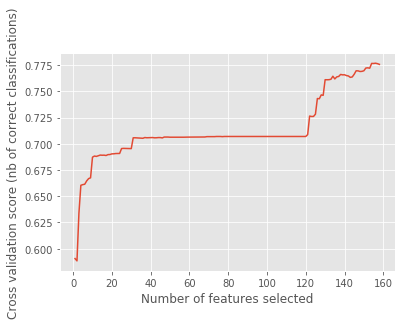

In [148]:
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1,len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [157]:
#Keeping 25 variables, but we can change that
cols_keep = list(var_selected['variable'][0:100])
sorted(cols_keep)

['Days_since_firstname_ssn',
 'Days_since_fulladdress',
 'Days_since_fulladdress_homephone',
 'Days_since_homephone',
 'Days_since_lastname_ssn',
 'Days_since_namedob',
 'Days_since_ssn',
 'Days_since_ssn_namedob',
 'Record_Count_14d',
 'Record_Count_1d',
 'Record_Count_21d',
 'Record_Count_2d',
 'Record_Count_30d',
 'Record_Count_3d',
 'Record_Count_60d',
 'Record_Count_7d',
 'Record_Count_firstname_ssn_14d',
 'Record_Count_firstname_ssn_14d/30d',
 'Record_Count_firstname_ssn_14d/60d',
 'Record_Count_firstname_ssn_1d',
 'Record_Count_firstname_ssn_1d/14d',
 'Record_Count_firstname_ssn_1d/21d',
 'Record_Count_firstname_ssn_1d/2d',
 'Record_Count_firstname_ssn_1d/30d',
 'Record_Count_firstname_ssn_1d/3d',
 'Record_Count_firstname_ssn_1d/60d',
 'Record_Count_firstname_ssn_1d/7d',
 'Record_Count_firstname_ssn_21d',
 'Record_Count_firstname_ssn_2d',
 'Record_Count_firstname_ssn_2d/14d',
 'Record_Count_firstname_ssn_2d/21d',
 'Record_Count_firstname_ssn_2d/30d',
 'Record_Count_firstname_ssn

In [150]:
allcols_keep = None
allcols_keep

In [151]:
allcols_keep = cols_keep
allcols_keep

['Days_since_firstname_ssn',
 'Days_since_fulladdress',
 'Days_since_fulladdress_homephone',
 'Days_since_homephone',
 'Days_since_lastname_ssn',
 'Days_since_namedob',
 'Days_since_ssn',
 'Days_since_ssn_namedob',
 'Record_Count_14d',
 'Record_Count_1d',
 'Record_Count_21d',
 'Record_Count_2d',
 'Record_Count_30d',
 'Record_Count_3d',
 'Record_Count_60d',
 'Record_Count_7d',
 'Record_Count_firstname_ssn_14d',
 'Record_Count_firstname_ssn_14d/30d',
 'Record_Count_firstname_ssn_14d/60d',
 'Record_Count_firstname_ssn_1d',
 'Record_Count_firstname_ssn_1d/14d',
 'Record_Count_firstname_ssn_1d/21d',
 'Record_Count_firstname_ssn_1d/2d',
 'Record_Count_firstname_ssn_1d/30d',
 'Record_Count_firstname_ssn_1d/3d']

In [152]:
allcols_keep.append('fraud_label')

In [153]:
NewData2 = DataAfterFilter[allcols_keep]

In [154]:
NewData2.to_csv('ApplicationDataWith25ImportantFeatures.csv')

<h3> Model Building </h3>

In [82]:
import pandas as pd
import scipy.stats as sps
import numpy as np
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import io
import time
import datetime
import time
plt.style.use("ggplot")

#Import sklearn libraries
import pandas as pd
import scipy.stats as sps
import numpy as np

from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import metrics

In [125]:
#Read the data with most important features
NewData2 = pd.read_csv('ApplicationDataWith25ImportantFeatures.csv')
oot=pd.read_csv("oot.csv")

In [150]:
# X_train, X_test, Y_train, Y_test = train_test_split(NewData2.loc[:,NewData2.columns != 'fraud_label'], NewData2['fraud_label'], test_size = 0.3, random_state = 10)

In [151]:
# random_state = 10
# MLModels = [LogisticRegression(random_state = 10),KNeighborsClassifier(), DecisionTreeClassifier(random_state= random_state), RandomForestClassifier(random_state = 10), GradientBoostingClassifier(random_state = 10), AdaBoostClassifier(random_state = 10), MLPClassifier(random_state = 10)]
# ClassifierAlgos = ['Logistic Regression', 'kNN', 'Decision Tree','Random Forest', 'Gradient Boosting', 'AdaBoost', 'Neural Network']
# classifiers = zip(MLModels, ClassifierAlgos)

In [152]:
allcols_keep = ['Days_since_firstname_ssn',
 'Days_since_fulladdress',
 'Days_since_fulladdress_homephone',
 'Days_since_homephone',
 'Days_since_lastname_ssn',
 'Days_since_namedob',
 'Days_since_ssn',
 'Days_since_ssn_namedob',
 'Record_Count_14d',
 'Record_Count_1d',
 'Record_Count_21d',
 'Record_Count_2d',
 'Record_Count_30d',
 'Record_Count_3d',
 'Record_Count_60d',
 'Record_Count_7d',
 'Record_Count_firstname_ssn_14d',
 'Record_Count_firstname_ssn_14d/30d',
 'Record_Count_firstname_ssn_14d/60d',
 'Record_Count_firstname_ssn_1d',
 'Record_Count_firstname_ssn_1d/14d',
 'Record_Count_firstname_ssn_1d/21d',
 'Record_Count_firstname_ssn_1d/2d',
 'Record_Count_firstname_ssn_1d/30d',
 'Record_Count_firstname_ssn_1d/3d','fraud_label']

In [153]:
OOTData = oot[allcols_keep]

In [154]:
OOTData.head()

Days_since_firstname_ssn  Days_since_fulladdress  \
10                     180.0                   180.0   
12                     180.0                   180.0   
16                     144.0                   144.0   
17                     180.0                   181.0   
21                     180.0                   180.0   

    Days_since_fulladdress_homephone  Days_since_homephone  \
10                             180.0                  17.0   
12                             180.0                  14.0   
16                             144.0                  43.0   
17                             180.0                 180.0   
21                             180.0                   4.0   

    Days_since_lastname_ssn  Days_since_namedob  Days_since_ssn  \
10                    180.0               180.0           180.0   
12                    180.0               180.0           180.0   
16                    144.0               144.0           144.0   
17                    180.0               180.0           180.0   
21                    180.0               180.0           180.0   

    Days_since_ssn_namedob  Record_Count_14d  Record_Count_1d  ...  \
10                   180.0               2.0              1.0  ...   
12                   180.0               1.0              1.0  ...   
16                   144.0               2.0              1.0  ...   
17                   180.0               1.0              1.0  ...   
21                   180.0               1.0              1.0  ...   

    Record_Count_firstname_ssn_14d  Record_Count_firstname_ssn_14d/30d  \
10                             1.0                                 1.0   
12                             1.0                                 1.0   
16                             1.0                                 1.0   
17                             1.0                                 1.0   
21                             1.0                                 1.0   

    Record_Count_firstname_ssn_14d/60d  Record_Count_firstname_ssn_1d  \
10                                 1.0                            1.0   
12                                 1.0                            1.0   
16                                 1.0                            1.0   
17                                 1.0                            1.0   
21                                 1.0                            1.0   

    Record_Count_firstname_ssn_1d/14d  Record_Count_firstname_ssn_1d/21d  \
10                                1.0                                1.0   
12                                1.0                                1.0   
16                                1.0                                1.0   
17                                1.0                                1.0   
21                                1.0                                1.0   

    Record_Count_firstname_ssn_1d/2d  Record_Count_firstname_ssn_1d/30d  \
10                               1.0                                1.0   
12                               1.0                                1.0   
16                               1.0                                1.0   
17                               1.0                                1.0   
21                               1.0                                1.0   

    Record_Count_firstname_ssn_1d/3d  fraud_label  
10                               1.0            0  
12                               1.0            0  
16                               1.0            0  
17                               1.0            0  
21                               1.0            0  

[5 rows x 26 columns]

In [155]:
oot_x = oot.filter(allcols_keep)
oot_y = oot[['fraud_label']]

intime_y = NewData2[['fraud_label']]
intime_x = NewData2.filter(allcols_keep)

np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(intime_x,intime_y, test_size = 0.30, random_state = 10,stratify=intime_y)

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')


print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(583454, 26) (583454, 1) (250053, 26) (250053, 1)


In [156]:
OOT_Test_Y = OOTData[['fraud_label']].astype('int')
OOT_Test_X = OOTData.loc[:,OOTData.columns != 'fraud_label']
X_train = X_train.loc[:,X_train.columns != 'fraud_label']
X_test = X_test.loc[:,X_test.columns != 'fraud_label']

In [157]:
X_train.columns

Index(['Days_since_firstname_ssn', 'Days_since_fulladdress',
       'Days_since_fulladdress_homephone', 'Days_since_homephone',
       'Days_since_lastname_ssn', 'Days_since_namedob', 'Days_since_ssn',
       'Days_since_ssn_namedob', 'Record_Count_14d', 'Record_Count_1d',
       'Record_Count_21d', 'Record_Count_2d', 'Record_Count_30d',
       'Record_Count_3d', 'Record_Count_60d', 'Record_Count_7d',
       'Record_Count_firstname_ssn_14d', 'Record_Count_firstname_ssn_14d/30d',
       'Record_Count_firstname_ssn_14d/60d', 'Record_Count_firstname_ssn_1d',
       'Record_Count_firstname_ssn_1d/14d',
       'Record_Count_firstname_ssn_1d/21d', 'Record_Count_firstname_ssn_1d/2d',
       'Record_Count_firstname_ssn_1d/30d',
       'Record_Count_firstname_ssn_1d/3d'],
      dtype='object')

In [14]:
# MLModels = [LogisticRegression(random_state = random_state),KNeighborsClassifier(), DecisionTreeClassifier(random_state= random_state), RandomForestClassifier(random_state = 10,n_estimators=500,max_depth=6), GradientBoostingClassifier(random_state = 10), AdaBoostClassifier(random_state = 10), MLPClassifier(random_state = 10)]
# ClassifierAlgos = ['Logistic Regression', 'kNN', 'Decision Tree','Random Forest', 'Gradient Boosting', 'AdaBoost', 'Neural Network']
# classifiers = zip(MLModels, ClassifierAlgos)

In [15]:
# for model, modelname in classifiers:
#     Model = model
#     FitModel = Model.fit(X_train, Y_train)
#     ModelPredict = FitModel.predict(X_test)
#     display (confusion_matrix(Y_test, ModelPredict))
#     ModelPredictOOT = FitModel.predict(OOT_Test_X)

In [16]:
#cross-validation
# knn = KNeighborsClassifier(n_neighbors=5)
# scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
# print(scores)

In [17]:
# k_range = list(range(1, 9))
# param_grid = dict(n_neighbors=k_range)
# print(param_grid)

In [18]:
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [60]:
# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.2],
# #     "min_samples_split": np.linspace(0.1, 12),
# #     "min_samples_leaf": np.linspace(0.1, 12),
# #     "max_depth":[3,5,8],
# #     "max_features":["log2","sqrt"],
# #     "criterion": ["friedman_mse",  "mae"],
# #     "subsample":[0.5, 0.618, 1.0],
# #     "n_estimators":[10]
#     }

# model = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

In [62]:
# model.fit(X_train.values, Y_train['fraud_label'].values)
# print(model.score(X_train, Y_train))
# # print(model.best_params_)

0.9886326169068896


In [186]:
#Define ML Models
# MLModels = [LogisticRegression(penalty = "l2"),DecisionTreeClassifier(max_depth = 4), RandomForestClassifier(n_estimators=500,max_depth=6), GradientBoostingClassifier(n_estimators = 200, max_depth = 5), AdaBoostClassifier(), MLPClassifier()]
MLModels = [LogisticRegression(penalty = "l1", max_iter = 200),DecisionTreeClassifier(max_depth = 4), AdaBoostClassifier(learning_rate = 0.5, n_estimators = 200), MLPClassifier(hidden_layer_sizes=(50,), learning_rate = 'adaptive', activation = 'logistic')]

# ClassifierAlgos = ['Logistic Regression', 'kNN', 'Decision Tree','Random Forest', 'Gradient Boosting', 'AdaBoost', 'Neural Network']
# classifiers = zip(MLModels, ClassifierAlgos)

FDR_p = 0.03
for model in MLModels:
    print ("--------------------------------------------------------------------------------")
    print (model)
    model = model

    #Run ML Models
    ModelIterationDict = {}
    random_state_list = [i for i in range(12,22,3)]
    # ModelIterationDict["Iteration"] = []
    ModelIterationDict["Training"] = []
    ModelIterationDict["Testing"] = []
    ModelIterationDict["Out of Time"] = []
    Model = model
    FitModel = Model.fit(X_train, Y_train)

    y_train=Y_train.copy()
    y_test=Y_test.copy()
    y_ott=OOT_Test_Y.copy()

    y_train["prob"]=  FitModel.predict_proba(X_train)[:,1]
    y_test["prob"]= FitModel.predict_proba(X_test)[:,1]
    y_ott["prob"] = FitModel.predict_proba(OOT_Test_X)[:,1]

    y_train.sort_values(by=['prob'], ascending = False, inplace = True)
    y_test.sort_values(by=['prob'], ascending = False, inplace = True)
    y_ott.sort_values(by=['prob'], ascending = False, inplace = True)

    #             #print(modelname+": ")
    #         print("Training FDR @ 3%: ", 100*sum(y_train.iloc[0:round(FDR_p*len(y_train)),0])/sum(y_train["Fraud"]) )    
    #         print("Testing FDR @ 3%: ",100*sum(y_test.iloc[0:round(FDR_p*len(y_test)),0])/sum(y_test["Fraud"]) )
    #         print("Out of Time FDR @ 3%: ",100*sum(y_ott.iloc[0:round(FDR_p*len(y_ott)),0])/sum(y_ott["Fraud"]) )
    #         print("\n")

    TrainingAccuracy = round(100*sum(y_train.iloc[0:round(FDR_p*len(y_train)),0])/sum(y_train["fraud_label"]),2)
    TestingAccuracy = round(100*sum(y_test.iloc[0:round(FDR_p*len(y_test)),0])/sum(y_test["fraud_label"]), 2)
    OOTAccuracy = round(100*sum(y_ott.iloc[0:round(FDR_p*len(y_ott)),0])/sum(y_ott["fraud_label"]), 2)

    print (TrainingAccuracy, TestingAccuracy, OOTAccuracy)


    # ModelIterationDict["Iteration"].append(rand)
    ModelIterationDict["Training"].append(TrainingAccuracy)
    ModelIterationDict["Testing"].append(TestingAccuracy)
    ModelIterationDict["Out of Time"].append(OOTAccuracy)



In [158]:
# X_train = X_train.drop(['prob', 'fraud_label'], axis = 1)
# X_test = X_test.drop(['prob', 'fraud_label'], axis = 1)
# OOT_Test_X = OOT_Test_X.drop(['prob', 'fraud_label'], axis = 1)

In [347]:
#Training
def plot_roc_curve(ytrue, yscore):
    
    fpr, tpr, thresholds = roc_curve(y_true = ytrue, y_score = yscore)
    print (fpr)
    print (tpr)
    print (thresholds)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

[0.         0.         0.         ... 0.99997392 0.99997913 1.        ]
[1.18976800e-04 2.49851279e-03 2.73646639e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[9.99999969e-01 9.99961236e-01 9.99959492e-01 ... 3.17137268e-04
 3.14652469e-04 2.00139116e-08]


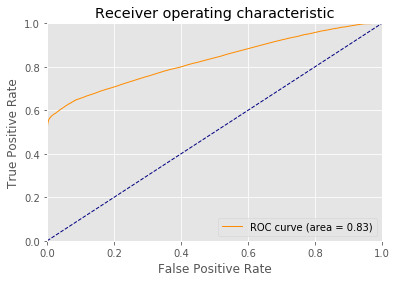

In [348]:
plot_roc_curve(Y_train, Model.predict_proba(X_train)[:,1])

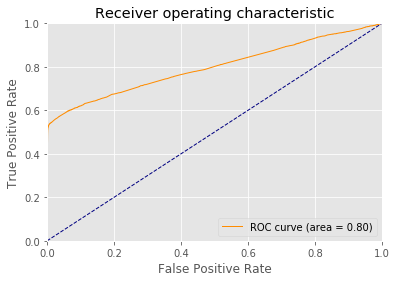

In [333]:
plot_roc_curve(Y_test, Model.predict_proba(X_test)[:,1])

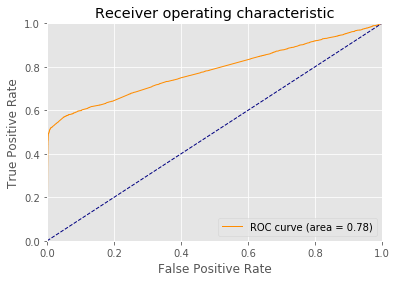

In [334]:
plot_roc_curve(OOT_Test_Y, Model.predict_proba(OOT_Test_X)[:,1])

In [15]:
#Convert the the label variables to int
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')
OOT_Test_Y = OOT_Test_Y.astype('int')

In [93]:
PercDataFDRDict = {}
#Table with 1% to 20% - frauds detected
PercentofData = [i/100 for i in range(1,101,1)]
Model = GradientBoostingClassifier(n_estimators = 200, max_depth = 5)
FitModel = Model.fit(X_train, Y_train)
for dataX, dataDF, data in [(X_train, Y_train, "Training"), (X_test, Y_test, "Testing"), (OOT_Test_X, OOT_Test_Y, "Out of Time")]: 
    start, end = 0,0
    PercDataFDRDict[data] = {}
    data1 = dataDF.copy()
    data1["prob"] =  FitModel.predict_proba(dataX)[:,1]
    data1.sort_values(by=['prob'], ascending = False, inplace = True)
    PercDataFDRDict[data]["Population Bin %"] = []
    PercDataFDRDict[data]["# Records"] = []   
    PercDataFDRDict[data]["# Goods"] = []
    PercDataFDRDict[data]["# Bads"] = []
    PercDataFDRDict[data]["% Goods"] = []
    PercDataFDRDict[data]['% Bads'] = []    
    for FDR_p in PercentofData:       
        start = end
        end = start + round(0.01*len(dataDF))   
        subset = data1.iloc[start:end,:]
        dataFDR = round(100*subset['fraud_label']/sum(dataDF["fraud_label"]),2)
        PercDataFDRDict[data]["Population Bin %"].append(FDR_p*100)
        PercDataFDRDict[data]["# Records"].append(subset.shape[0])
        PercDataFDRDict[data]["# Goods"].append(subset[subset["fraud_label"] == 0].shape[0])
        PercDataFDRDict[data]["# Bads"].append(subset[subset["fraud_label"] == 1].shape[0])
        PercDataFDRDict[data]["% Goods"].append(round((subset[subset["fraud_label"] == 0].shape[0]*100)/(subset.shape[0]),2))
        PercDataFDRDict[data]['% Bads'].append(round((subset[subset["fraud_label"] == 1].shape[0]*100)/(subset.shape[0]), 2))      
        

/Users/User/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [159]:
OOT_Test_X.head(10)

Days_since_firstname_ssn  Days_since_fulladdress  \
10                     180.0                   180.0   
12                     180.0                   180.0   
16                     144.0                   144.0   
17                     180.0                   181.0   
21                     180.0                   180.0   
23                     180.0                   180.0   
24                     180.0                   180.0   
26                     180.0                    71.0   
42                     180.0                   180.0   
48                     180.0                   180.0   

    Days_since_fulladdress_homephone  Days_since_homephone  \
10                             180.0                  17.0   
12                             180.0                  14.0   
16                             144.0                  43.0   
17                             180.0                 180.0   
21                             180.0                   4.0   
23                             180.0                  82.0   
24                             180.0                   1.0   
26                             180.0                  19.0   
42                             180.0                   9.0   
48                             180.0                   7.0   

    Days_since_lastname_ssn  Days_since_namedob  Days_since_ssn  \
10                    180.0               180.0           180.0   
12                    180.0               180.0           180.0   
16                    144.0               144.0           144.0   
17                    180.0               180.0           180.0   
21                    180.0               180.0           180.0   
23                    180.0               180.0           180.0   
24                    180.0               180.0           180.0   
26                    180.0               180.0            71.0   
42                    180.0               180.0           180.0   
48                    180.0               180.0           180.0   

    Days_since_ssn_namedob  Record_Count_14d  Record_Count_1d  ...  \
10                   180.0               2.0              1.0  ...   
12                   180.0               1.0              1.0  ...   
16                   144.0               2.0              1.0  ...   
17                   180.0               1.0              1.0  ...   
21                   180.0               1.0              1.0  ...   
23                   180.0               1.0              1.0  ...   
24                   180.0               1.0              1.0  ...   
26                   180.0               1.0              1.0  ...   
42                   180.0               1.0              1.0  ...   
48                   180.0               1.0              1.0  ...   

    Record_Count_7d  Record_Count_firstname_ssn_14d  \
10              2.0                             1.0   
12              1.0                             1.0   
16              1.0                             1.0   
17              1.0                             1.0   
21              1.0                             1.0   
23              1.0                             1.0   
24              1.0                             1.0   
26              1.0                             1.0   
42              1.0                             1.0   
48              1.0                             1.0   

    Record_Count_firstname_ssn_14d/30d  Record_Count_firstname_ssn_14d/60d  \
10                                 1.0                                 1.0   
12                                 1.0                                 1.0   
16                                 1.0                                 1.0   
17                                 1.0                                 1.0   
21                                 1.0                                 1.0   
23                                 1.0                                 1.0   
24                                 1.0     

In [160]:

# data22 = OOT_Test_Y.copy()
# data22["prob"] =  FitModel.predict_proba(dataX)[:,1]
# oot['fraud_score'] = data22['prob']

data_train_X = X_train
data_test_X = X_test
data_OOT_X = OOT_Test_X

data_train_X['prob'] = FitModel.predict_proba(X_train)[:,1]
data_test_X['prob'] = FitModel.predict_proba(X_test)[:,1]
data_OOT_X['prob'] = FitModel.predict_proba(OOT_Test_X)[:,1]

data_train_X['fraud_label'] = Y_train
data_test_X['fraud_label'] = Y_test
data_OOT_X['fraud_label'] = OOT_Test_Y



# alldata_fraud_score = pd.concat([FitModel.predict_proba(X_train)[:,1],FitModel.predict_proba(X_test)[:,1],FitModel.predict_proba(OOT_Test_X)[:,1]],axis = 1)
data_new_all = pd.concat([data_train_X, data_test_X,data_OOT_X],axis = 0)

In [161]:
newdata = data.merge(data_new_all, left_index = True, right_index = True, how = 'inner')

In [168]:
newdata.shape

(1000000, 360)

In [163]:
newdata['only_1'] = 1

In [ ]:
newdata.to_csv('AllDataWithFraudScore.xlsx')

<h3> Plot fraud score graphs (fraud score vs cumulative count) for some entities </h3>

In [184]:
#Fraud score graph - entity
def plot_graphs_fraud_score(entity_list, entity):
    for var in entity_list:
        df = newdata.loc[data[entity] == var].sort_values(by = 'date')
        # df['cumsum_var'] = df['prob'].cumsum()
        df['cumcount_var'] = df['only_1'].cumsum()
        # df['fraud_score'] = df['cumsum_var']/df['cumcount_var']
        plt.figure()
        plt.ylabel('Fraud score')
        plt.xlabel('Cumulative count of records')
        plt.title(entity + ": " + str(var))
        plt.plot(df['cumcount_var'], df['prob'])
        plt.xticks(rotation =90)
        

In [185]:
#Create top most frequent homephone list, namedob list, ssn list
top_homephone_list = data['homephone'].value_counts().head(50).index.tolist()
top_namedob_list = data['namedob'].value_counts().head(20).index.tolist()
top_ssn_list = data['ssn'].value_counts().head(20).index.tolist()
top_lastname_list = data['lastname'].value_counts().head(20).index.tolist()
top_firstname_list = data['firstname'].value_counts().head(20).index.tolist()

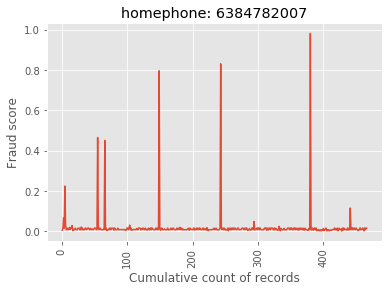

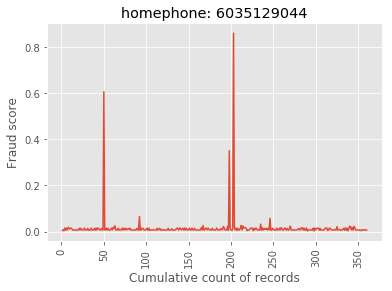

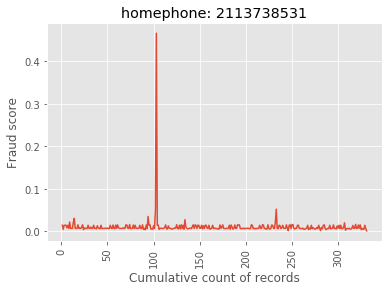

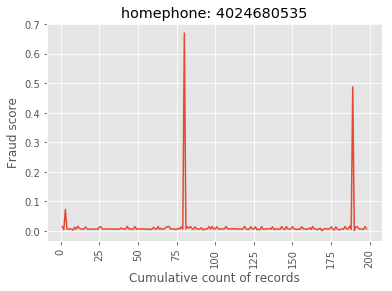

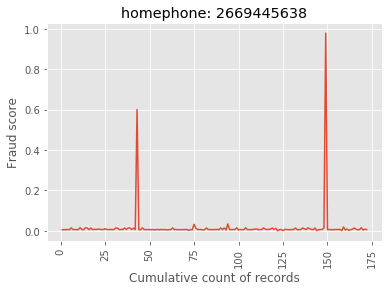

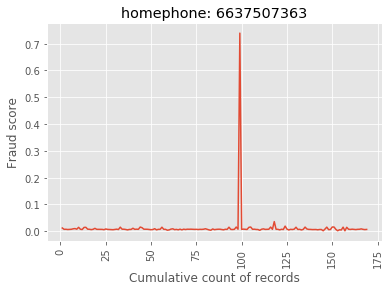

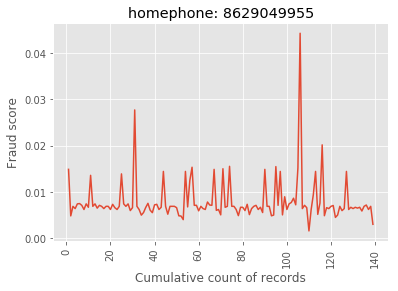

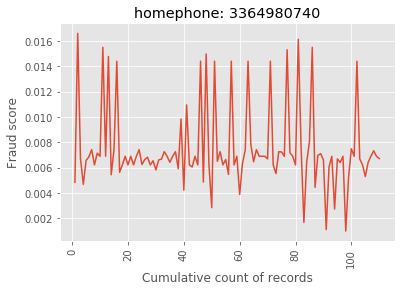

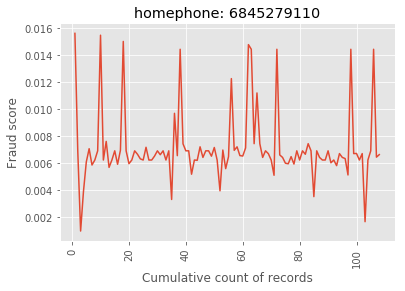

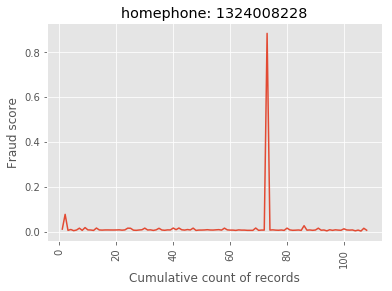

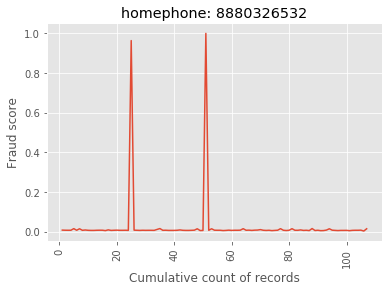

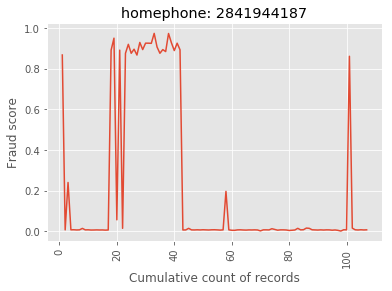

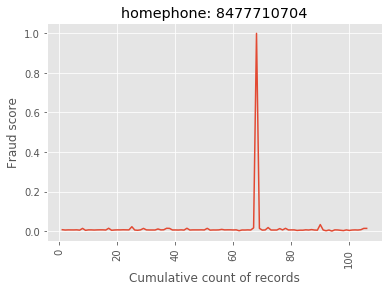

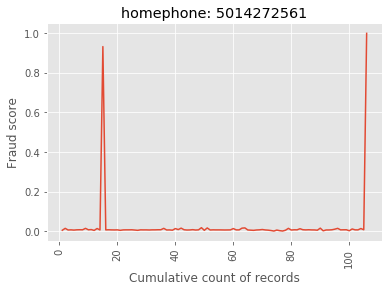

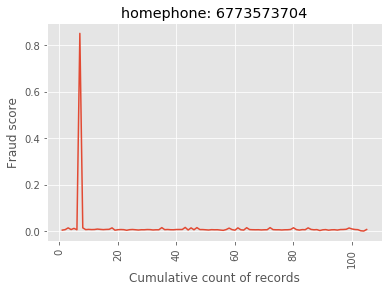

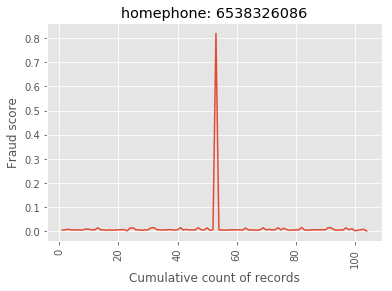

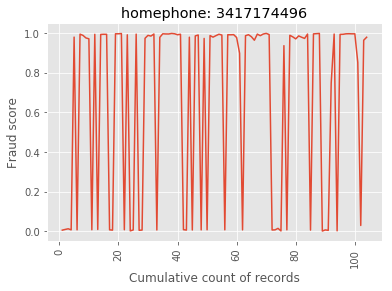

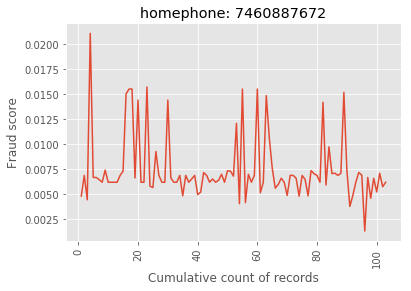

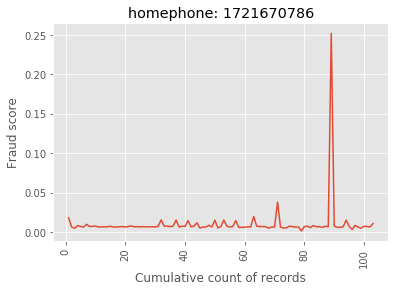

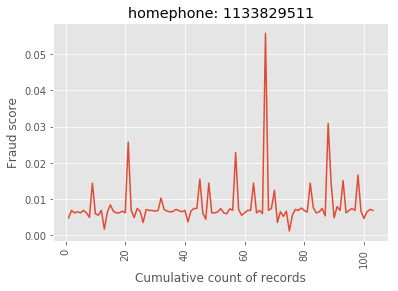

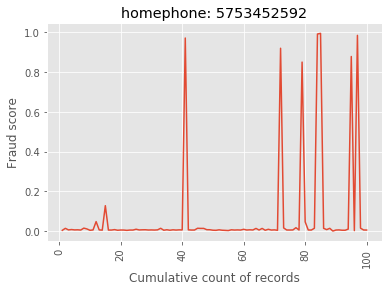

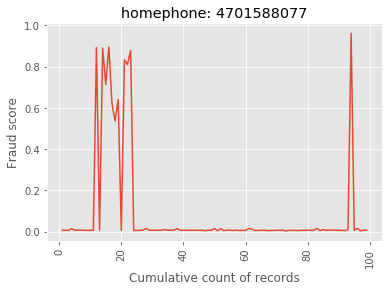

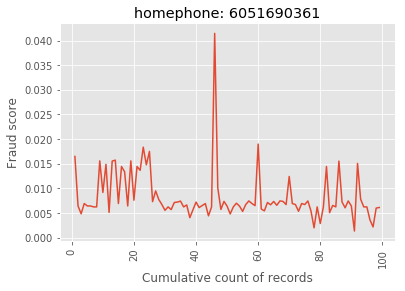

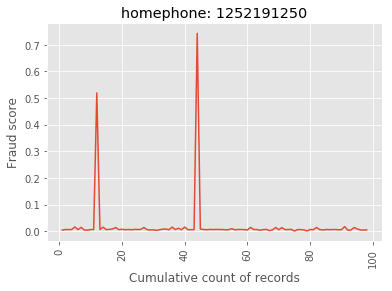

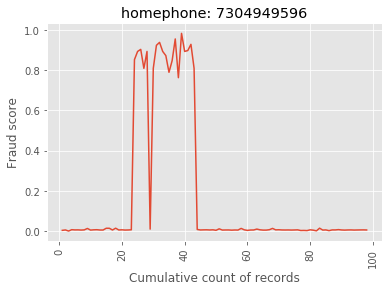

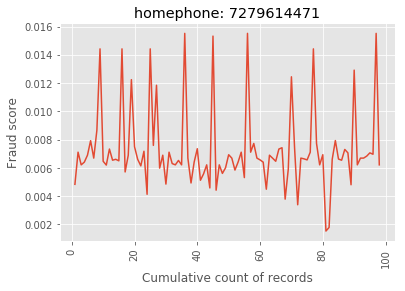

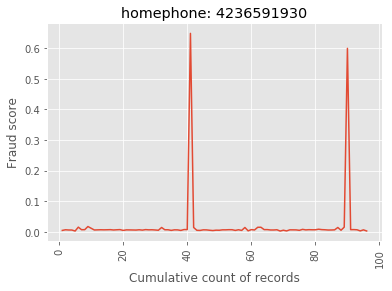

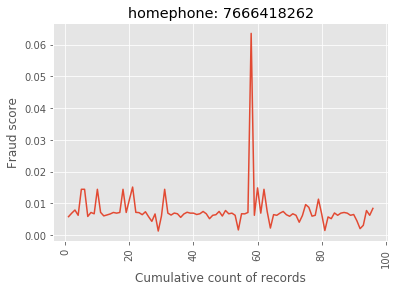

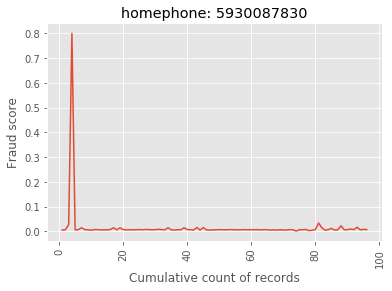

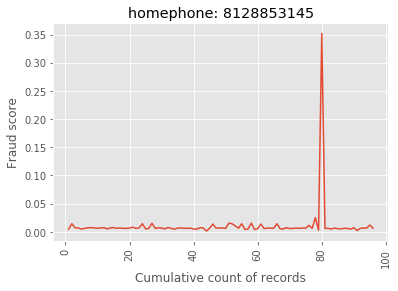

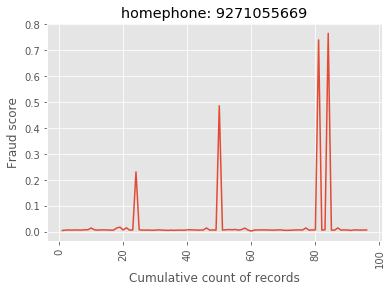

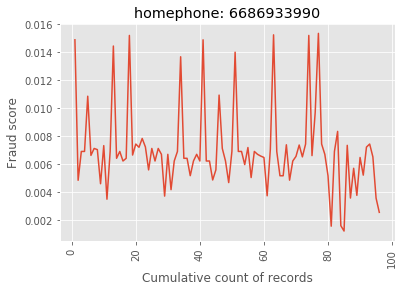

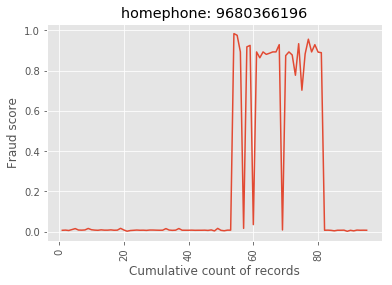

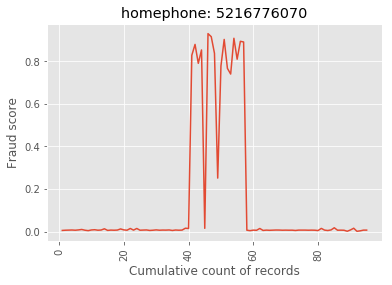

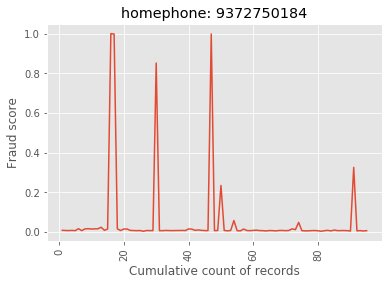

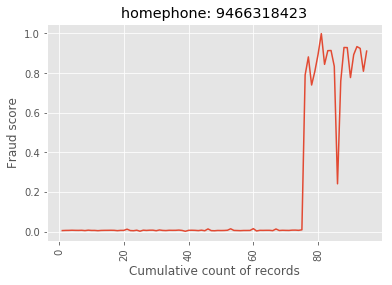

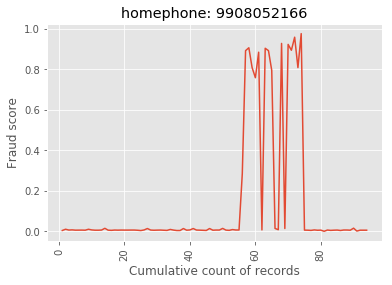

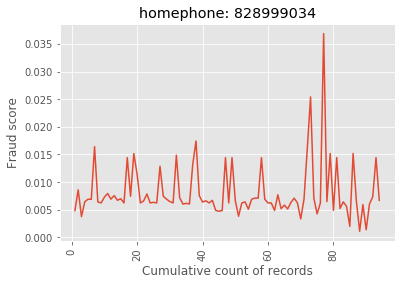

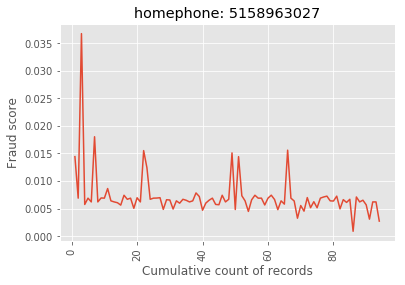

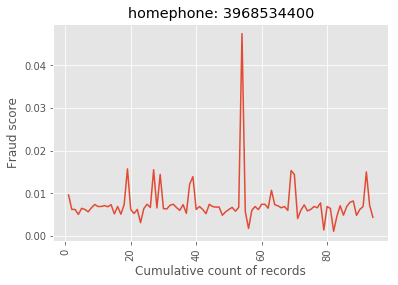

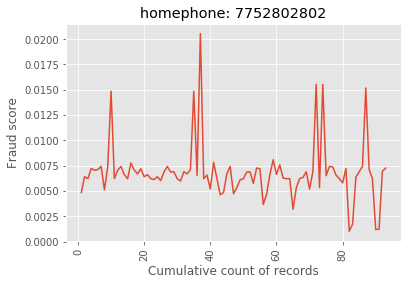

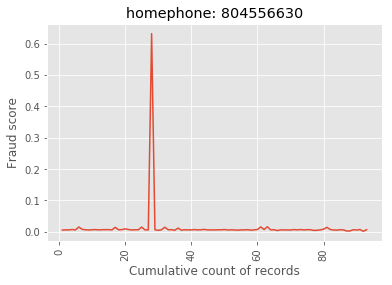

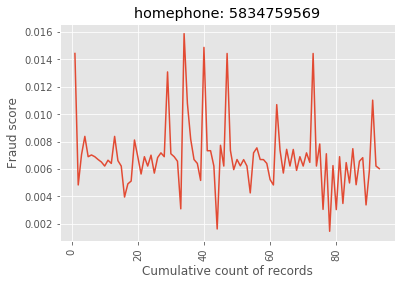

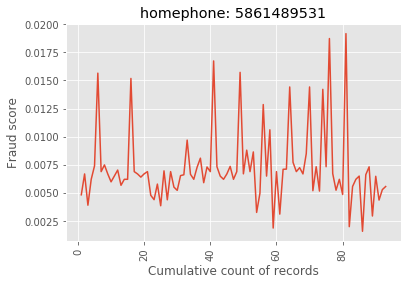

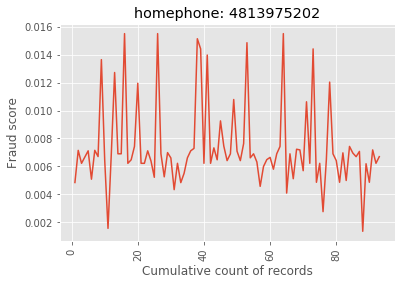

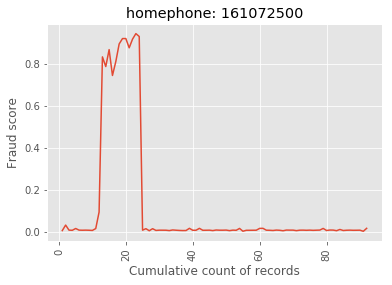

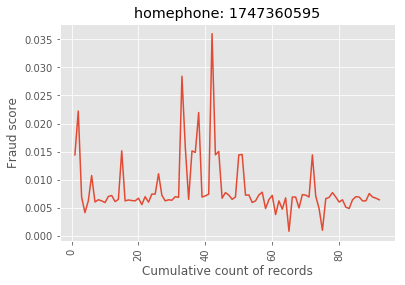

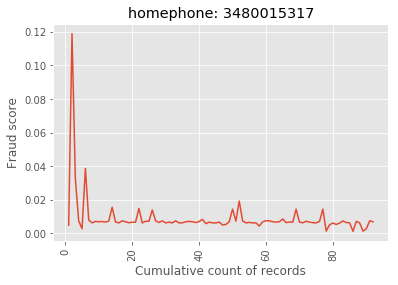

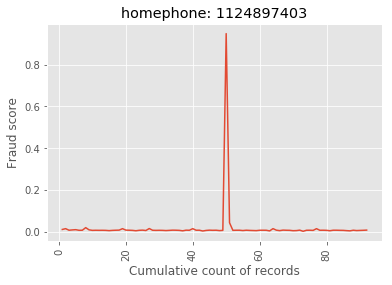

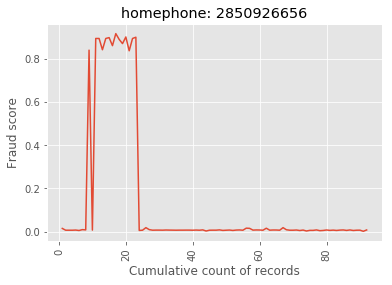

In [186]:
# most frequent homephone - fraud score graph
plot_graphs_fraud_score(top_homephone_list, 'homephone')

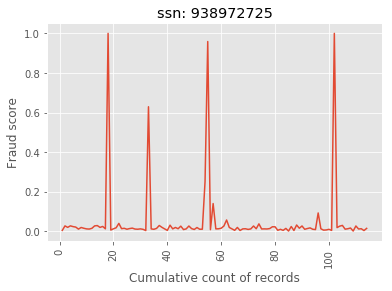

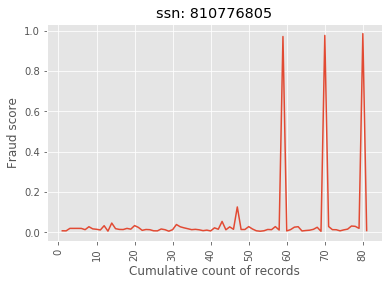

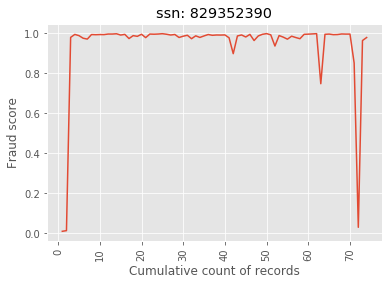

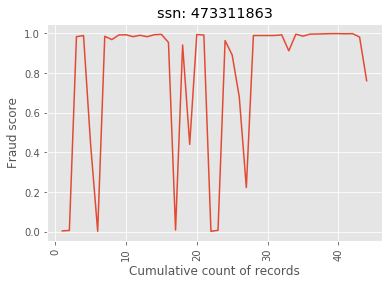

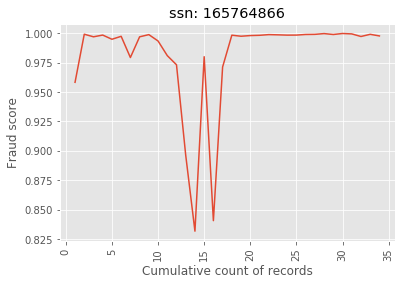

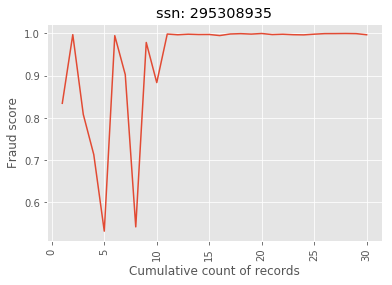

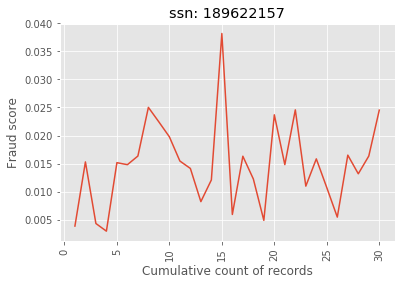

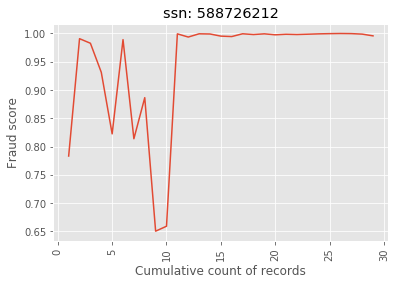

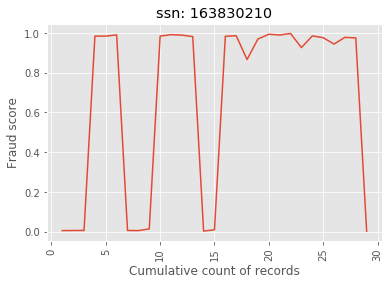

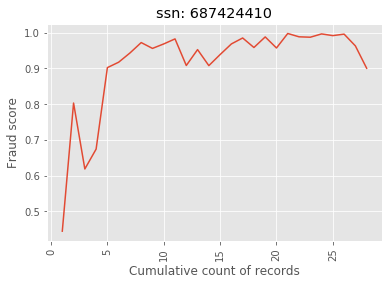

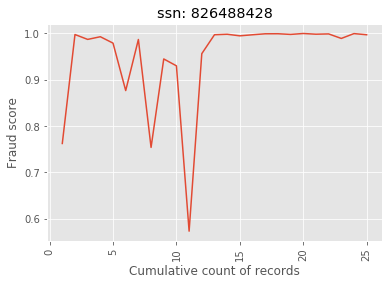

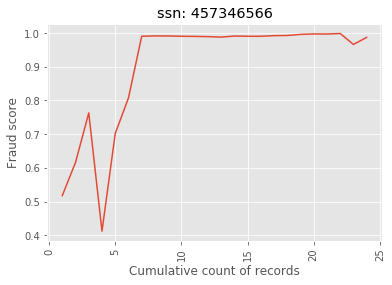

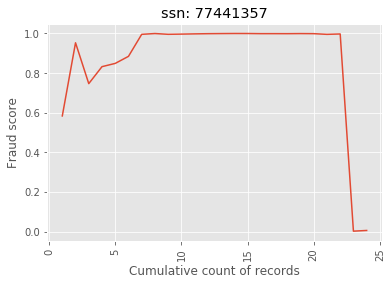

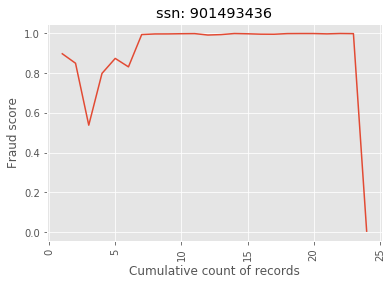

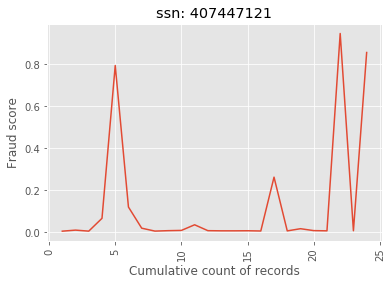

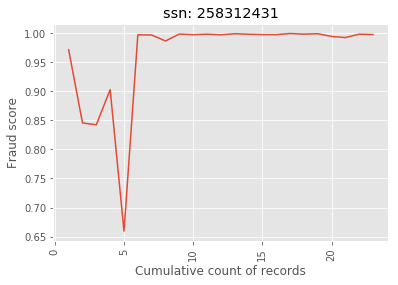

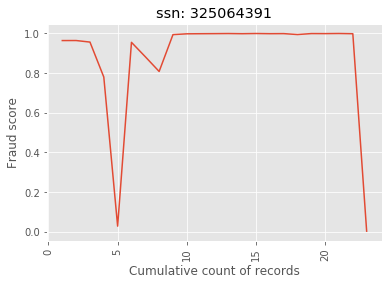

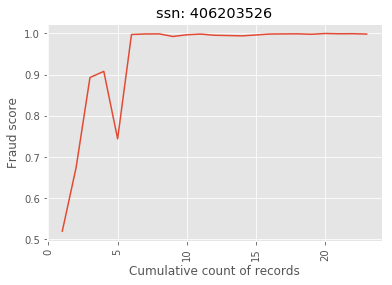

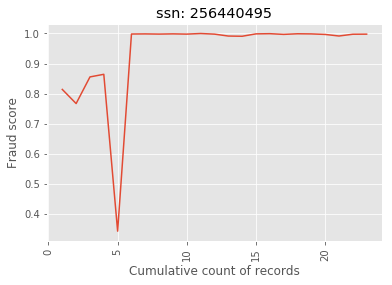

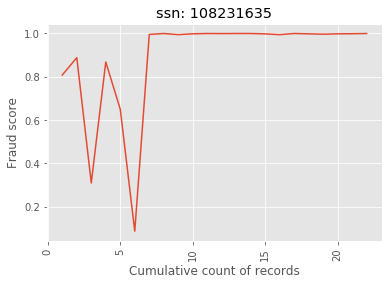

In [187]:
# most frequent ssn - fraud score graph
plot_graphs_fraud_score(top_ssn_list, 'ssn')

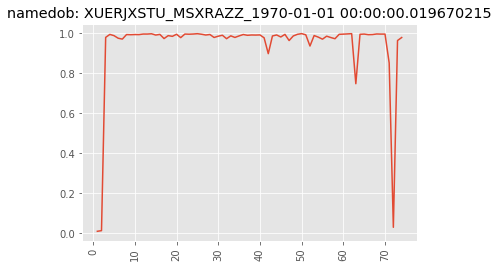

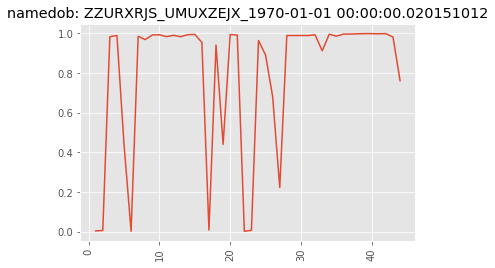

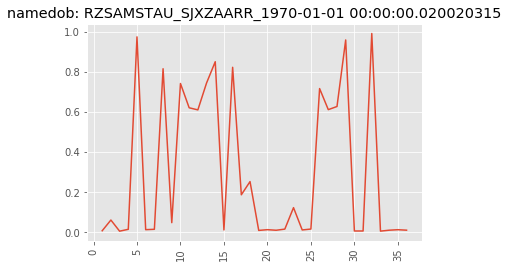

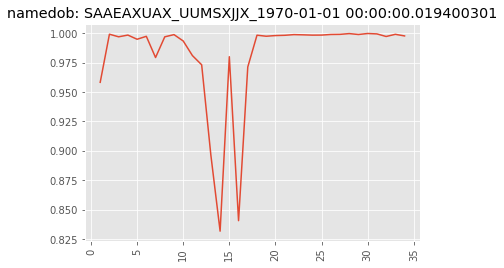

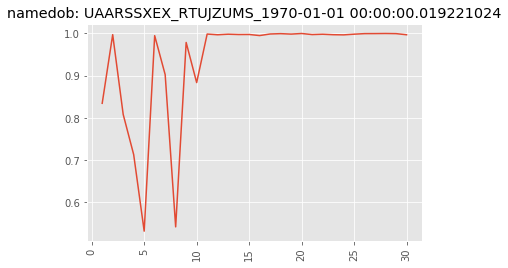

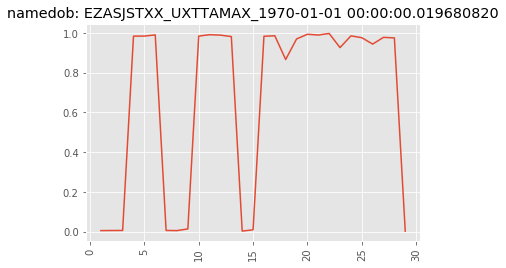

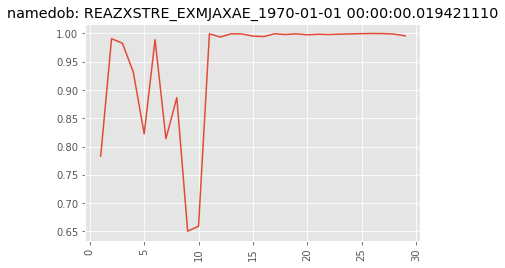

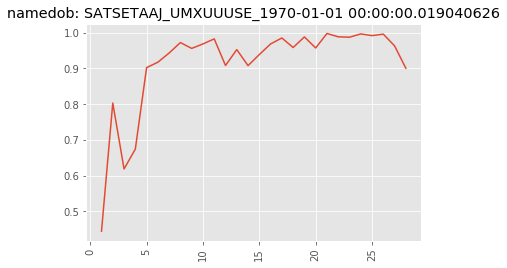

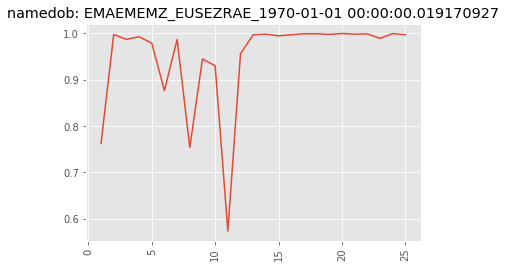

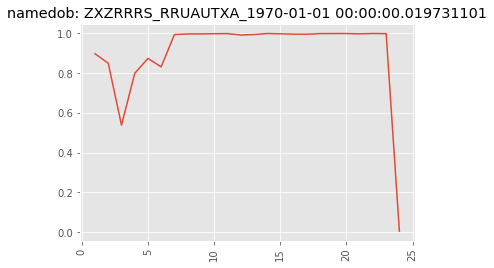

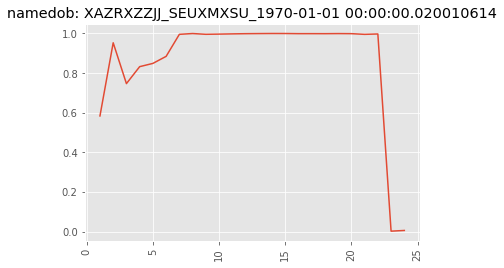

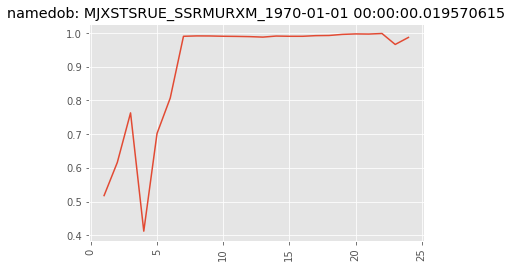

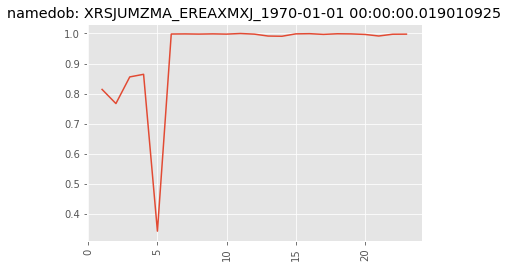

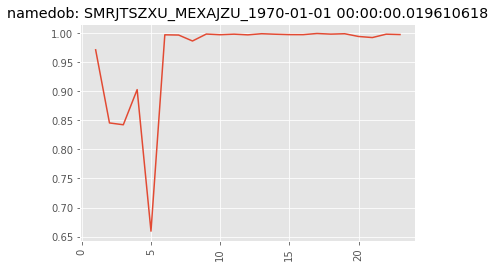

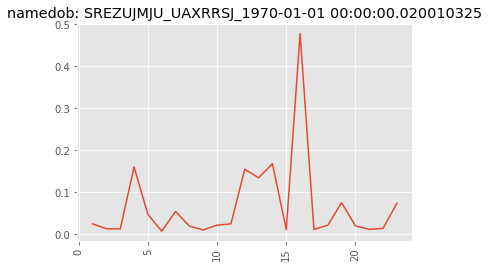

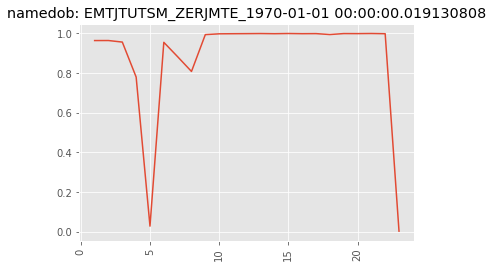

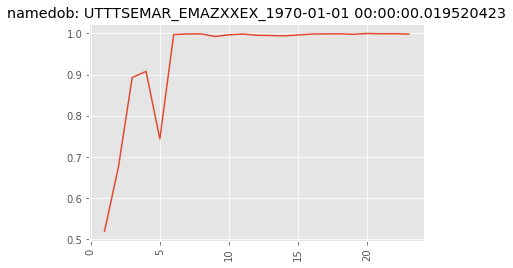

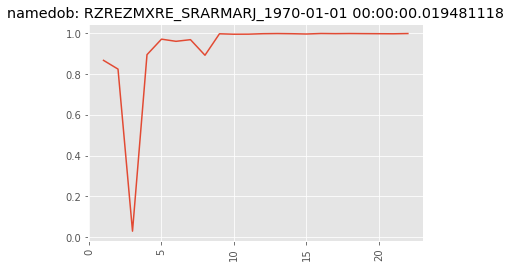

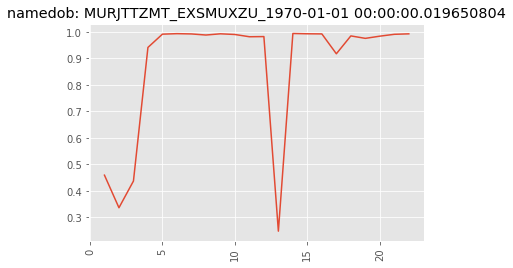

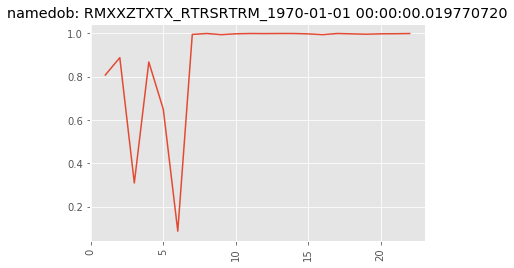

In [171]:
# most frequent namedob - fraud score graph
plot_graphs_fraud_score(top_namedob_list, 'namedob')

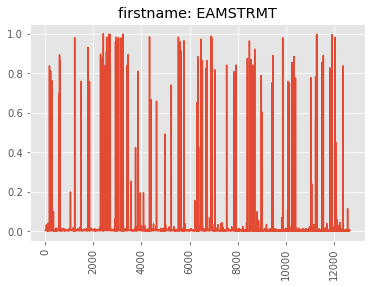

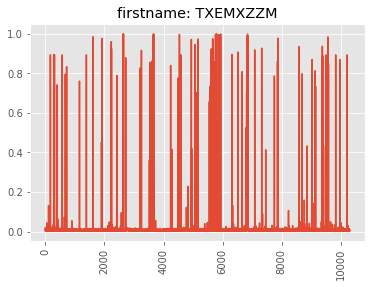

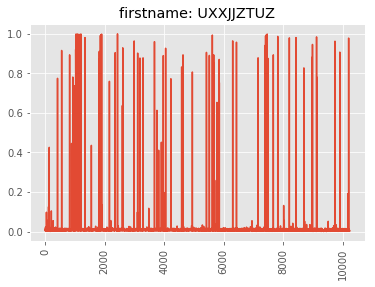

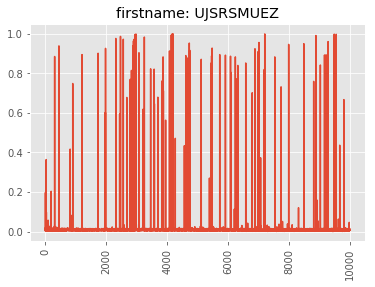

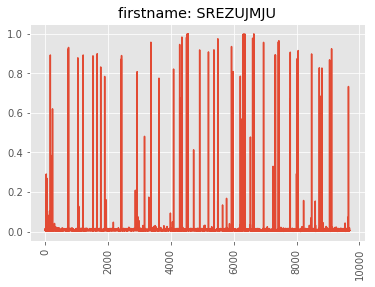

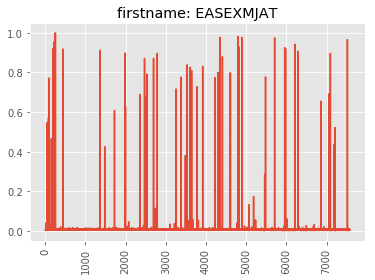

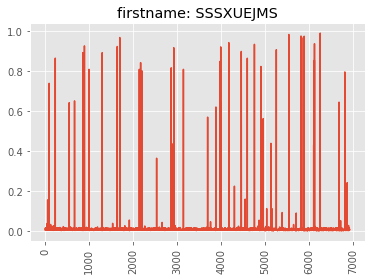

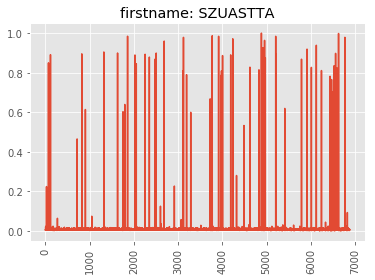

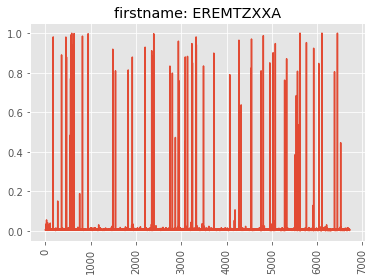

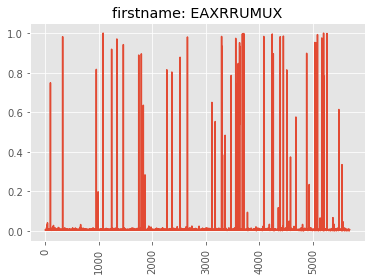

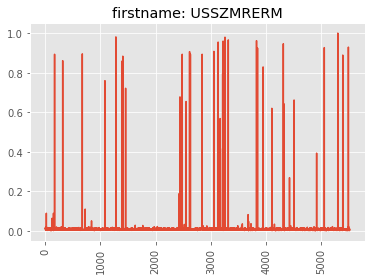

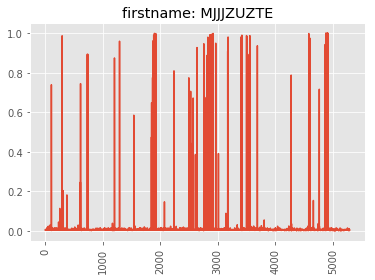

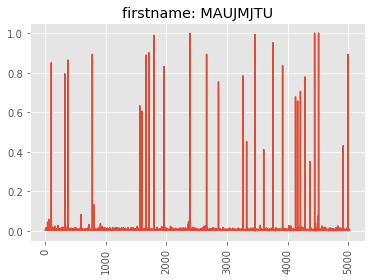

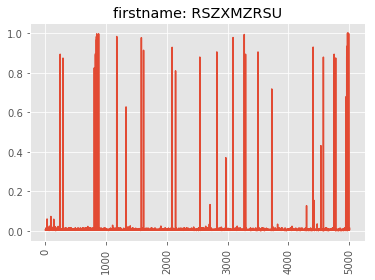

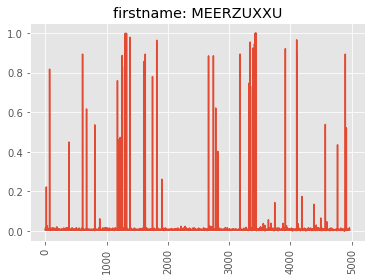

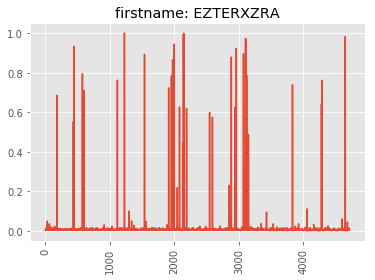

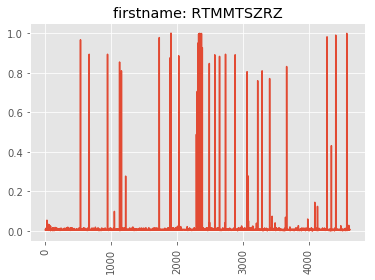

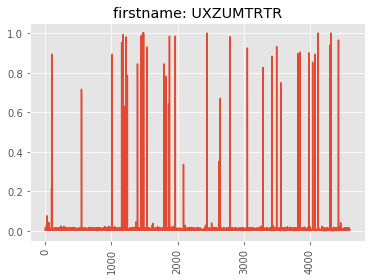

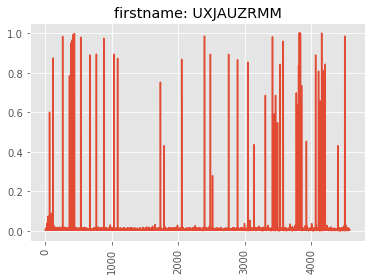

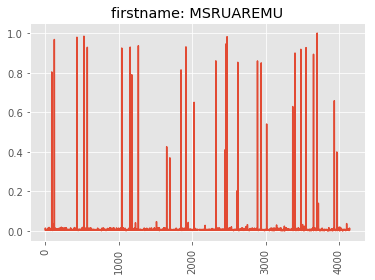

In [172]:
# most frequent firstname - fraud score graph
plot_graphs_fraud_score(top_firstname_list, 'firstname')

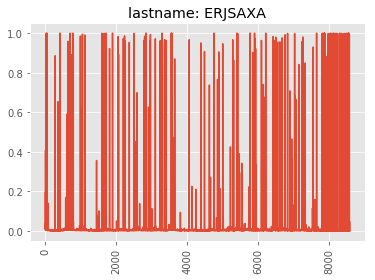

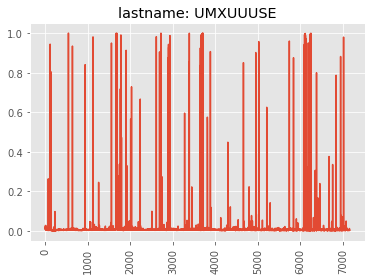

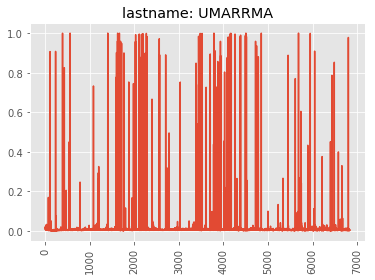

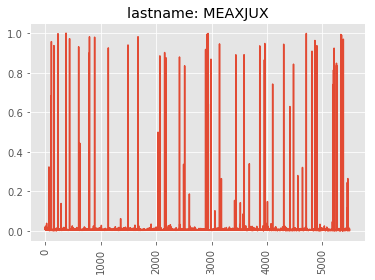

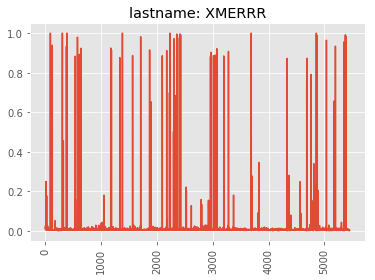

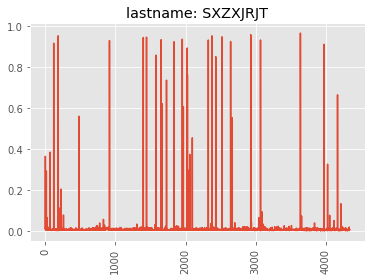

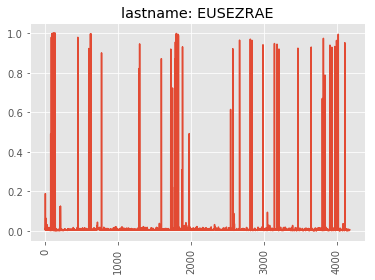

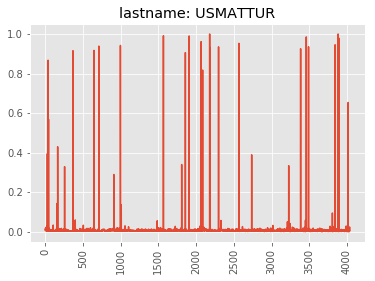

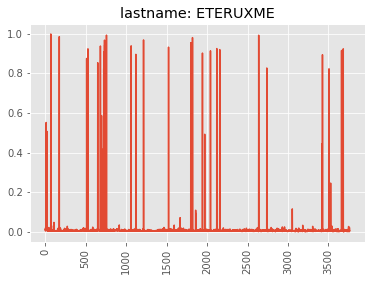

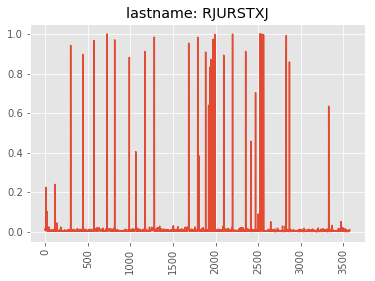

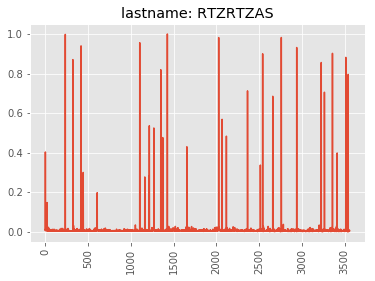

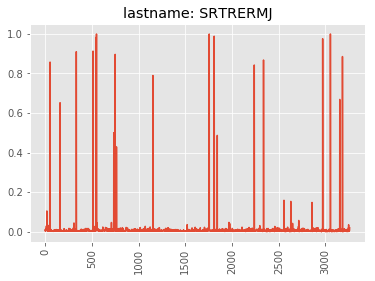

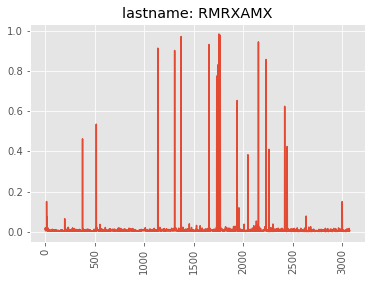

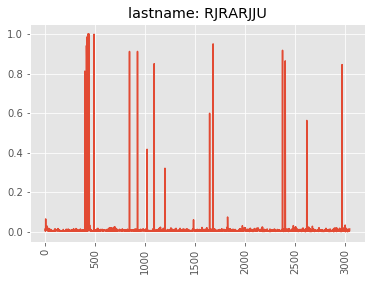

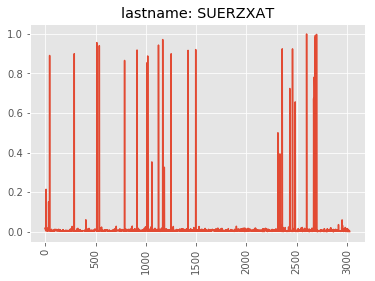

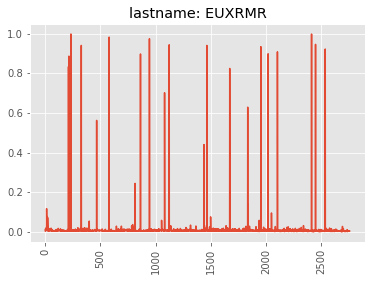

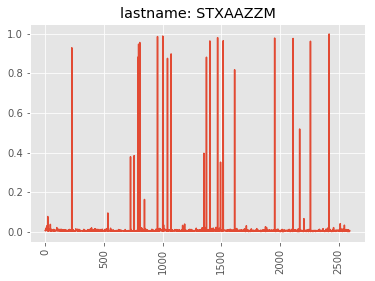

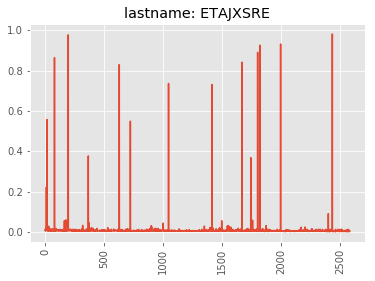

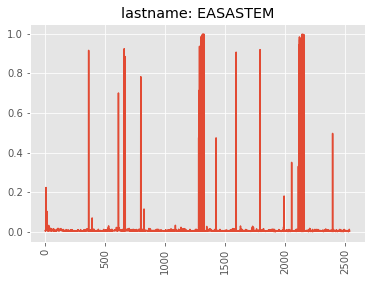

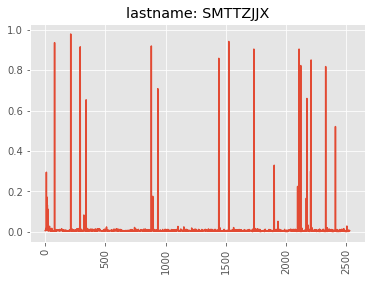

In [173]:
# most frequent lastname - fraud score graph
plot_graphs_fraud_score(top_lastname_list, 'lastname')

In [178]:
newdata.head(10)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1    Weekday  Month Month_name  \
0           0        392155          392155     Monday      5        May   
1           1        111750          111750  Wednesday      2   February   
2           2         86163           86163     Monday      2   February   
3           3        803863          803863     Friday     10    October   
4           4         21604           21604     Friday      1    January   
5           5        510533          510533  Wednesday      7       July   
6           6         36330           36330   Thursday      1    January   
7           7        754928          754928     Monday     10    October   
8           8        146081          146081    Tuesday      2   February   
9           9        649712          649712   Thursday      8     August   

   record       date        ssn  firstname  ...  \
0  392156 2016-05-23  831175367  UMAJTUAMR  ...   
1  111751 2016-02-10  365107231  XRZRTRSUJ  ...   
2   86164 2016-02-01   32418157  XZRTRETMA  ...   
3  803864 2016-10-21  130078683  SXMAZZMJS  ...   
4   21605 2016-01-08  220750582  EASEXMJAT  ...   
5  510534 2016-07-06  308855299  RMMETJZEU  ...   
6   36331 2016-01-14  350509475  XUZSJTEET  ...   
7  754929 2016-10-03  350509475  XUZSJTEET  ...   
8  146082 2016-02-23  614880816  XESSAEZMS  ...   
9  649713 2016-08-25  634708644  EZASJSTXX  ...   

  Record_Count_firstname_ssn_14d/30d_y Record_Count_firstname_ssn_14d/60d_y  \
0                                  1.0                                  1.0   
1                                  1.0                                  1.0   
2                                  1.0                                  1.0   
3                                  1.0                                  1.0   
4                                  1.0                                  1.0   
5                                  1.0                                  1.0   
6                                  1.0                                  1.0   
7                                  1.0                                  1.0   
8                                  1.0                                  1.0   
9                                  1.0                                  1.0   

  Record_Count_firstname_ssn_1d_y Record_Count_firstname_ssn_1d/14d_y  \
0                             1.0                                 1.0   
1                             1.0                                 1.0   
2                             1.0                                 1.0   
3                             1.0                                 1.0   
4                             1.0                                 1.0   
5                             1.0                                 1.0   
6                             1.0                                 1.0   
7                             1.0                                 1.0   
8                             1.0                                 1.0   
9                             1.0                                 1.0   

  Record_Count_firstname_ssn_1d/21d_y Record_Count_firstname_ssn_1d/2d_y  \
0                                 1.0                                1.0   
1                                 1.0                                1.0   
2                                 1.0                                1.0   
3                                 1.0                                1.0   
4                                 1.0                                1.0   
5                                 1.0                                1.0   
6                                 1.0                                1.0   
7                                 1.0                                1.0   
8                                 1.0                                1.0   
9                                 1.0                                1.0   

  Record_Count_firstname_ssn_1d/30d_y Record_Count_firstname_ssn_1d/3d_y  \
0                

<h4> Plot fraud score graph with respect to date </h3

In [188]:
#Fraud score graph - entity
def plot_graphs_fraud_score_date(entity_list, entity):
    for var in entity_list:
        df = newdata.loc[data[entity] == var].sort_values(by = 'date')
        # df['cumsum_var'] = df['prob'].cumsum()
#         df['cumcount_var'] = df['only_1'].cumsum()
        # df['fraud_score'] = df['cumsum_var']/df['cumcount_var']
        plt.figure()
        plt.ylabel('Fraud Score')
        plt.xlabel('Month')
        plt.title(entity + ": " + str(var))
        plt.plot(df['Month_name'], df['prob'])
        plt.xticks(rotation =90)

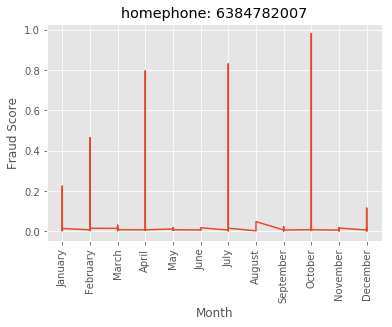

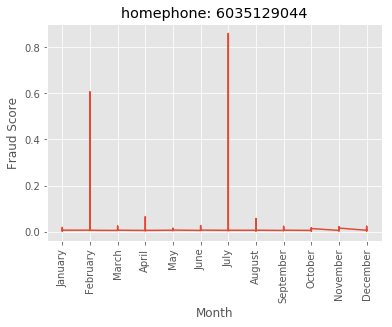

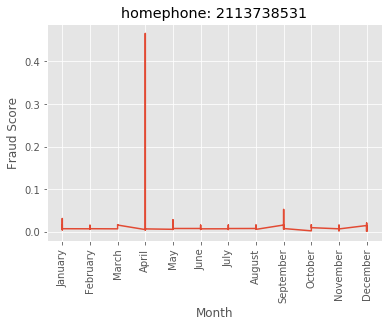

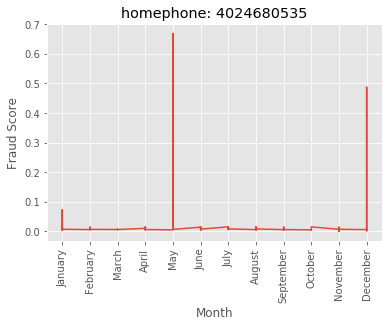

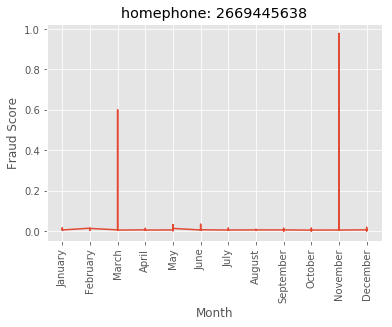

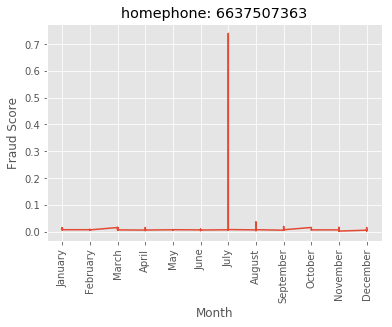

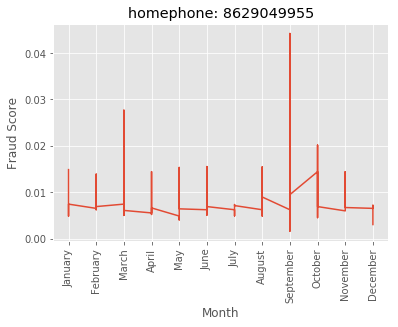

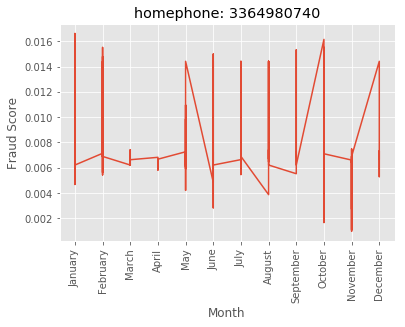

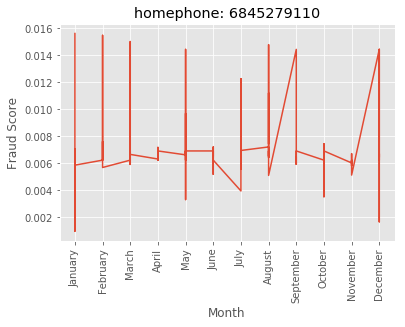

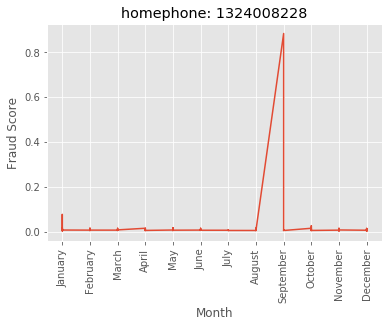

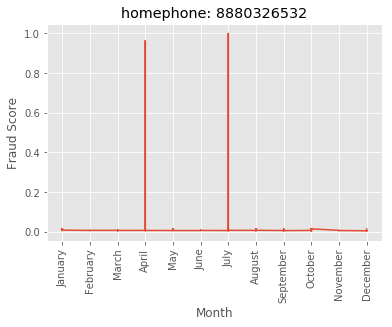

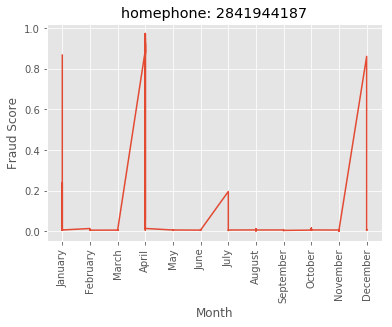

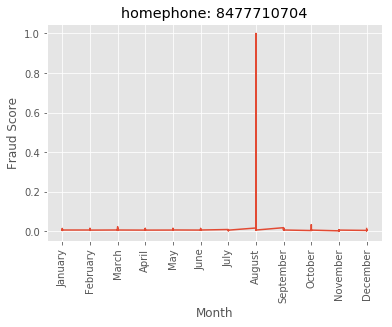

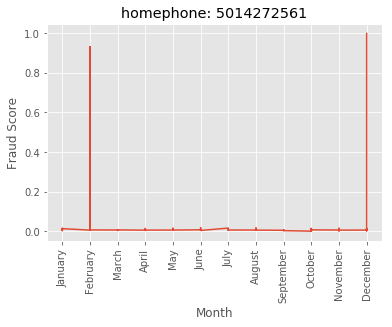

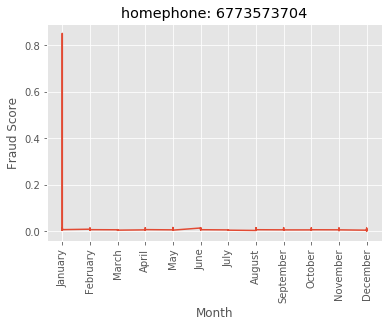

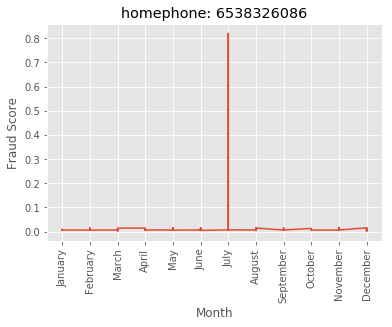

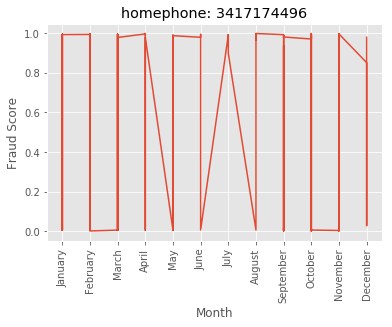

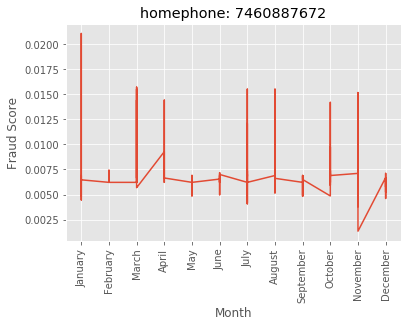

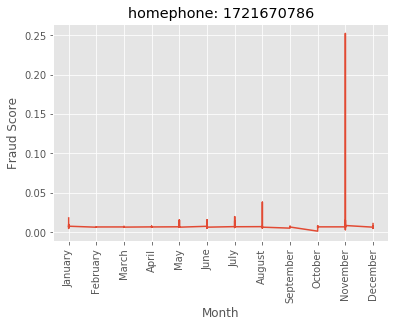

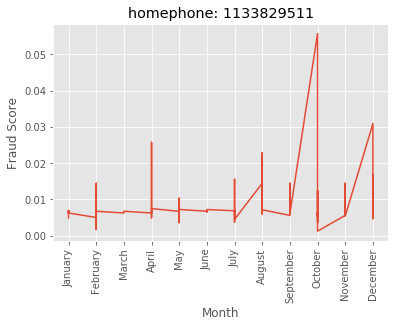

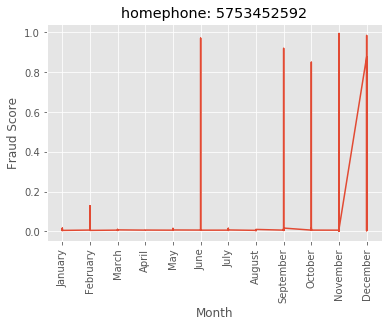

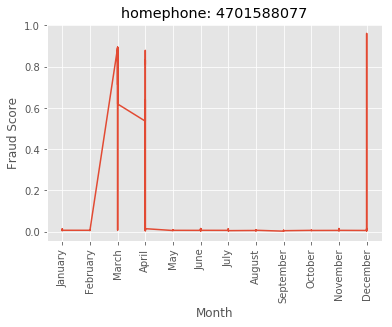

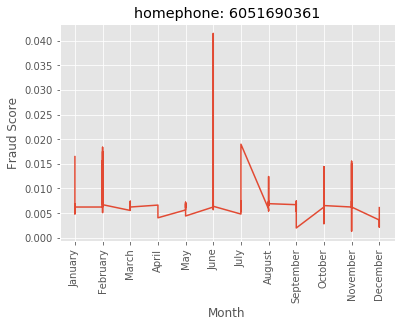

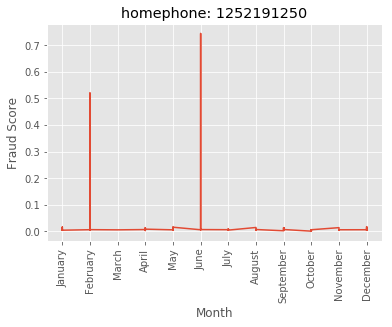

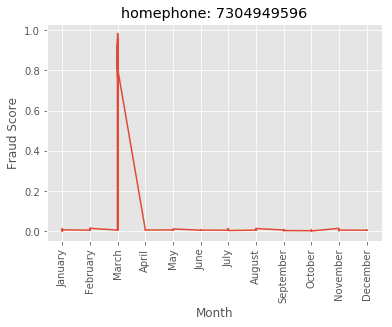

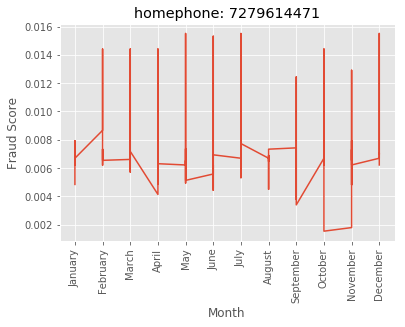

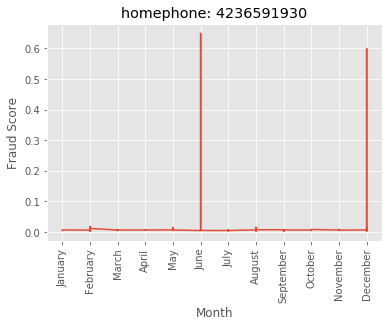

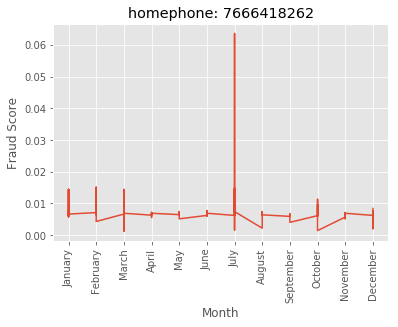

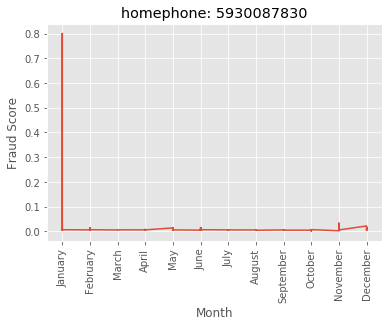

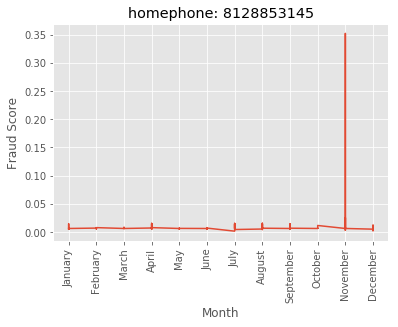

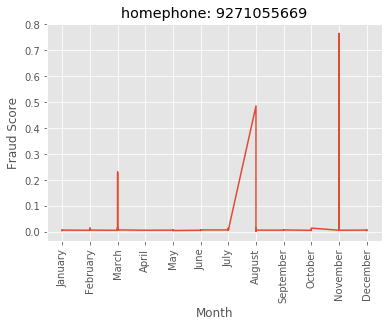

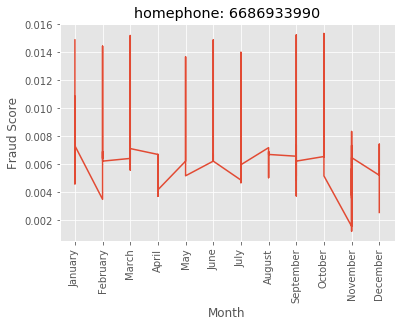

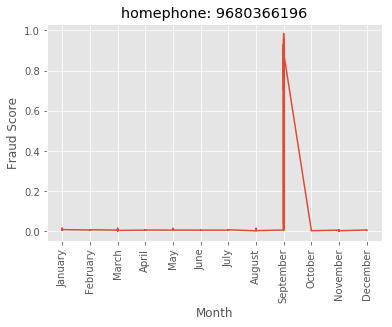

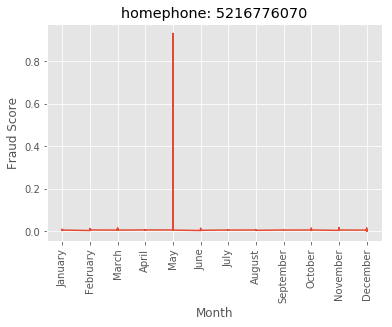

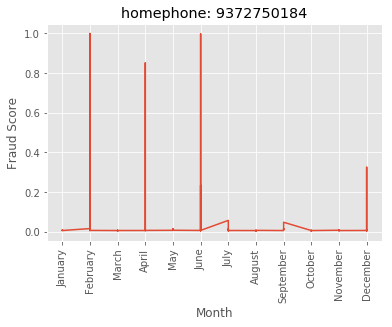

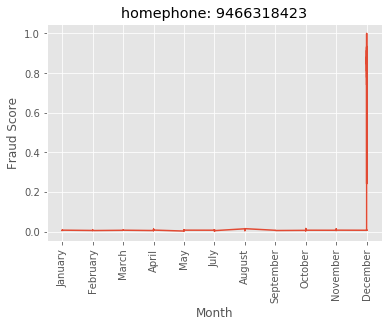

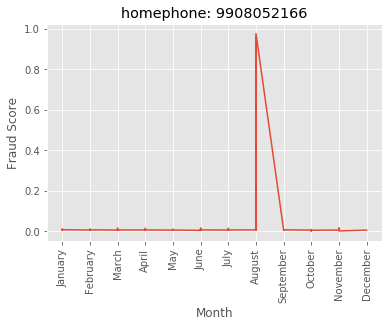

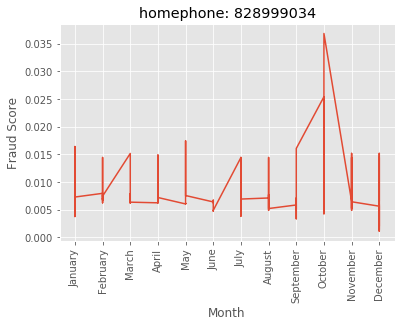

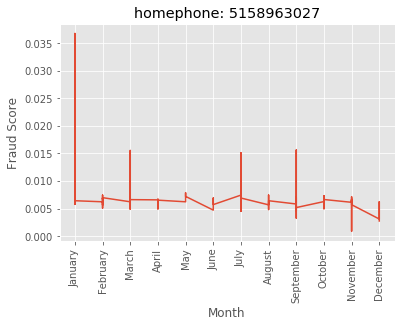

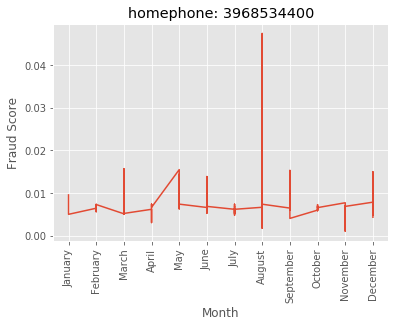

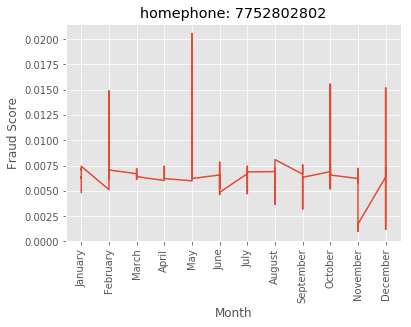

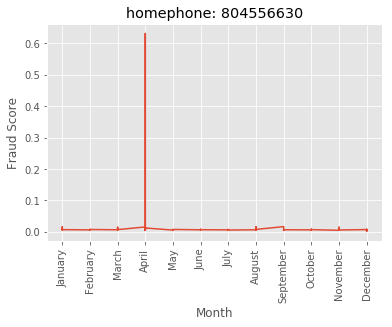

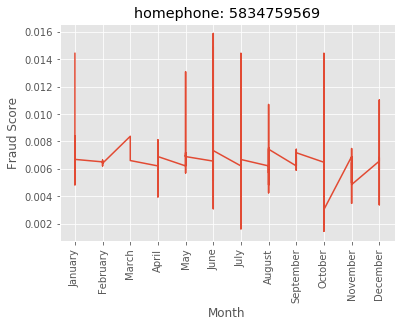

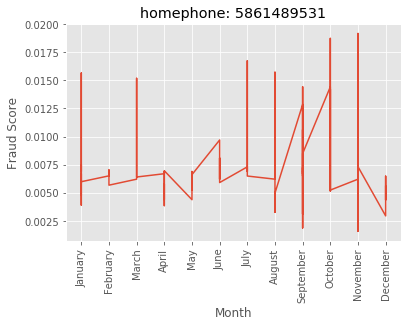

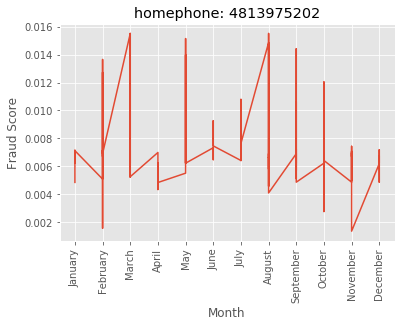

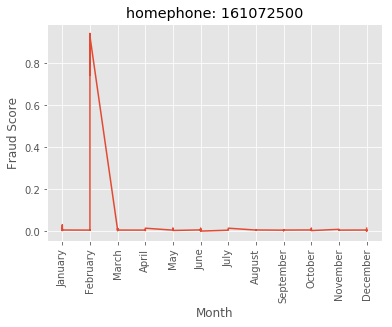

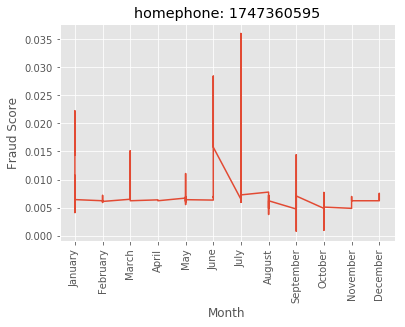

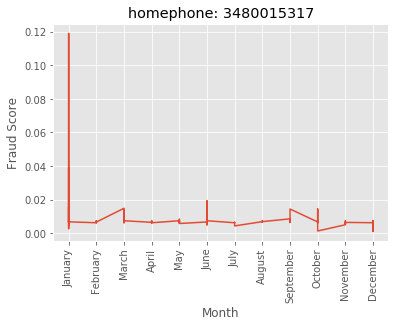

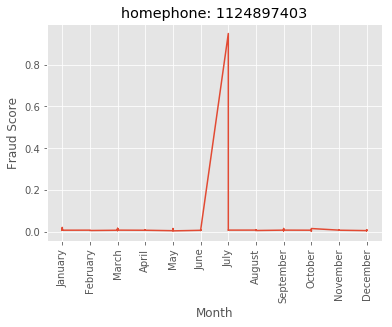

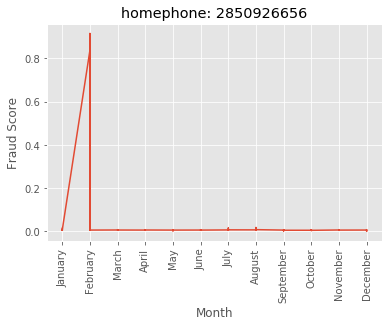

In [189]:
# most frequent homephone - fraud score graph
plot_graphs_fraud_score_date(top_homephone_list, 'homephone')

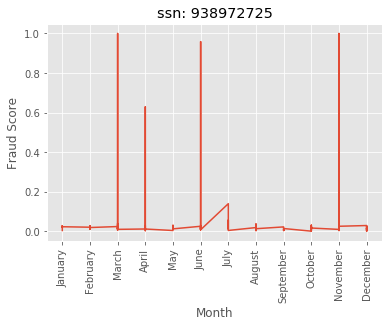

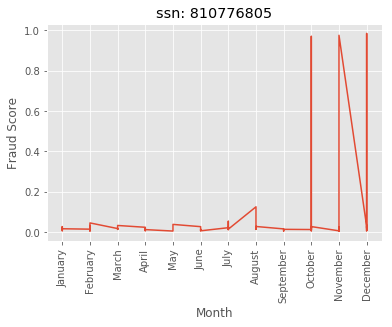

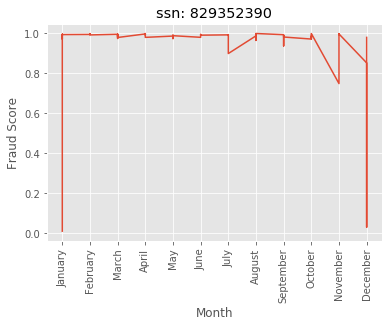

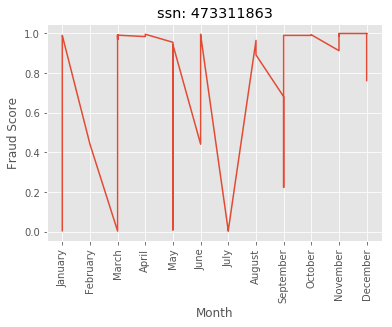

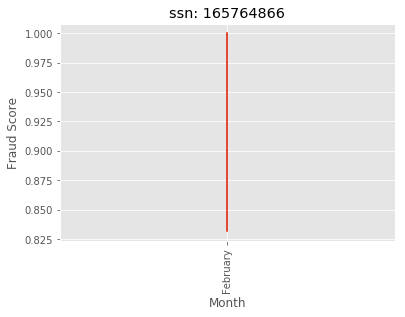

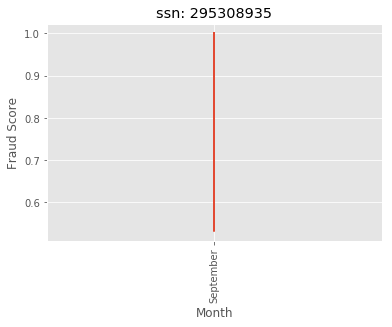

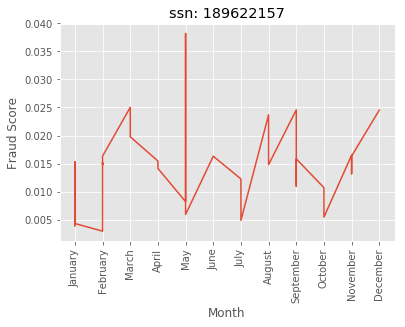

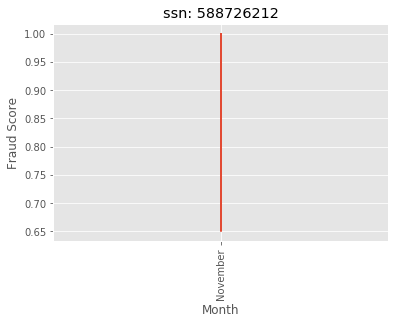

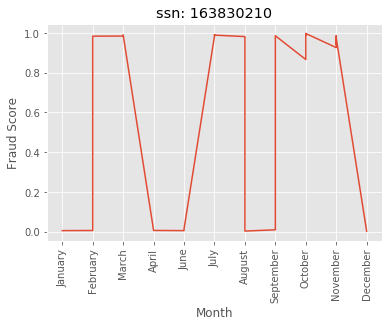

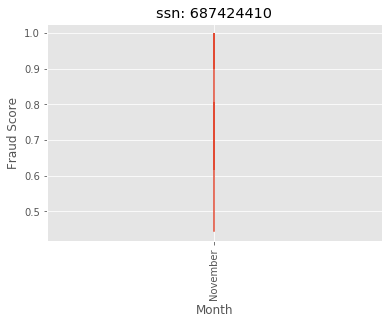

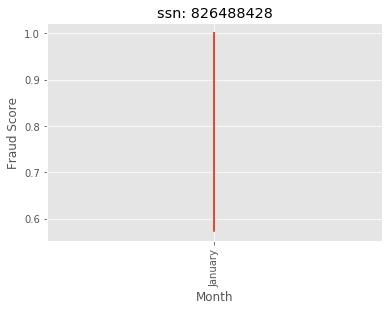

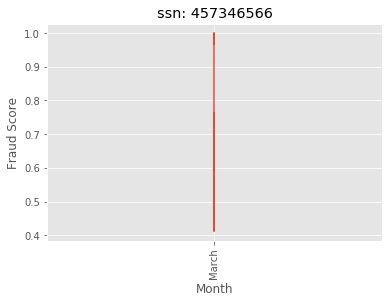

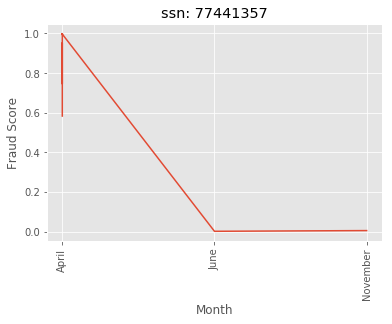

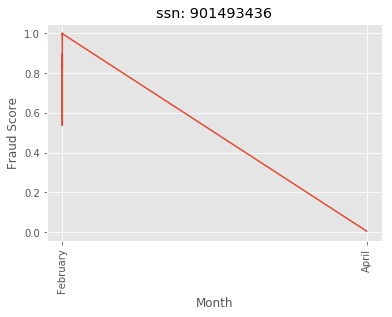

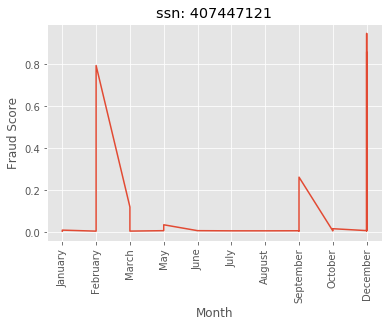

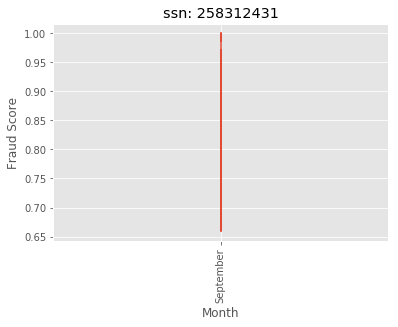

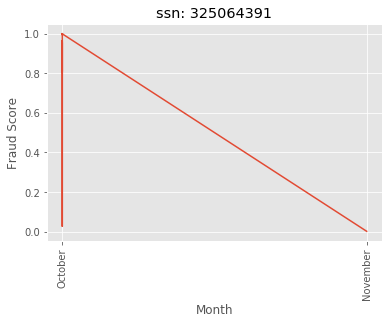

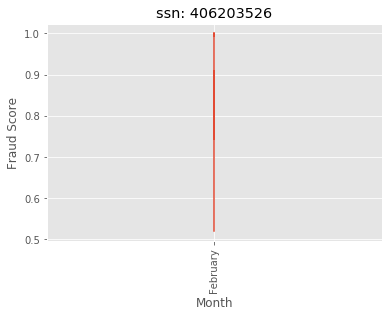

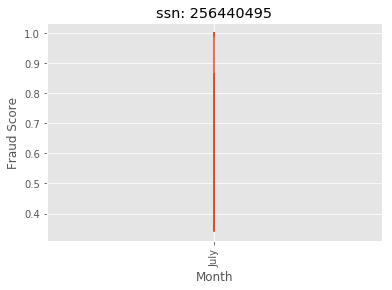

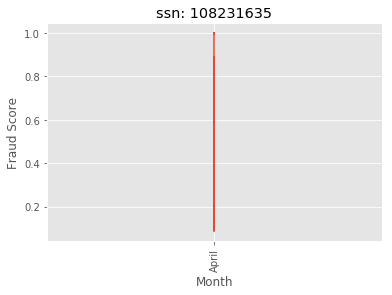

In [190]:
# most frequent ssn - fraud score graph
plot_graphs_fraud_score_date(top_ssn_list, 'ssn')

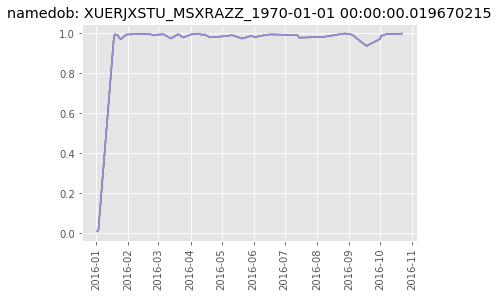

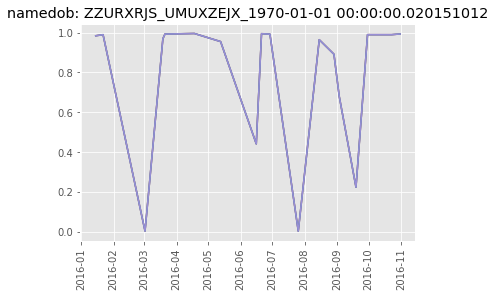

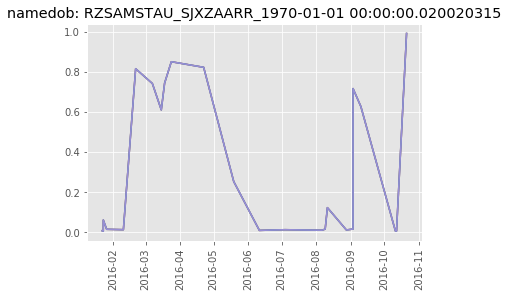

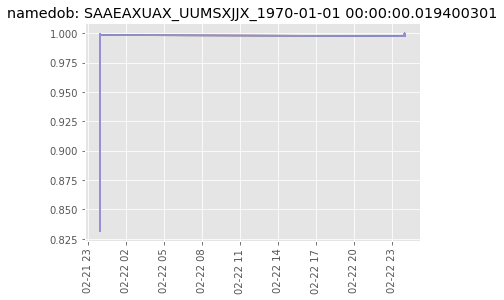

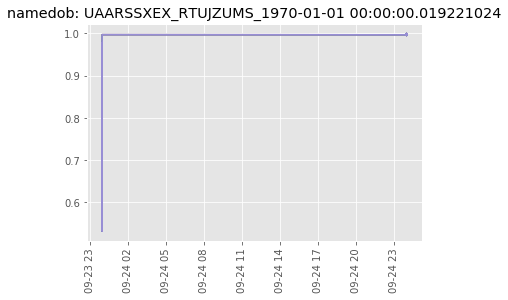

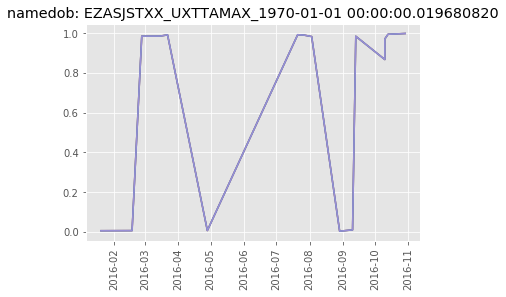

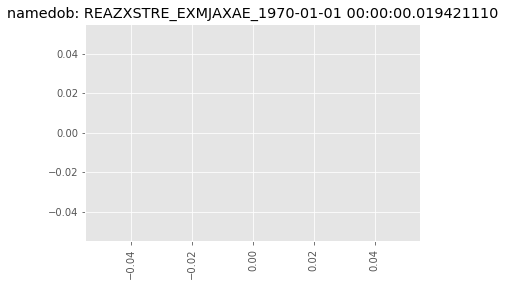

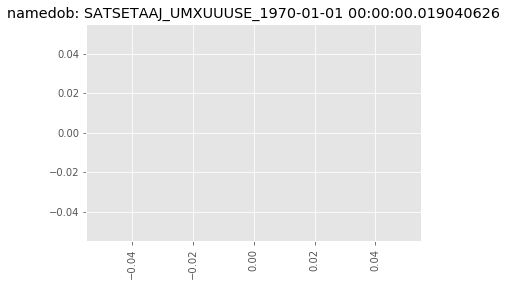

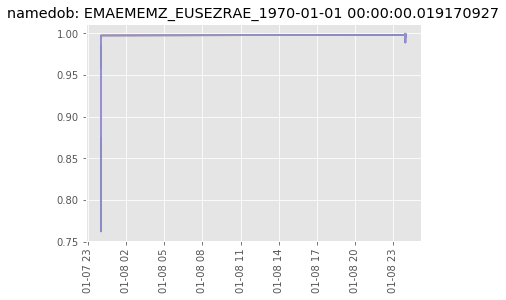

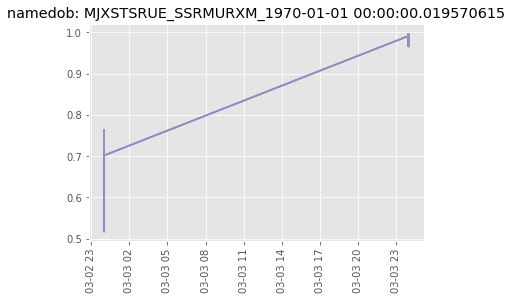

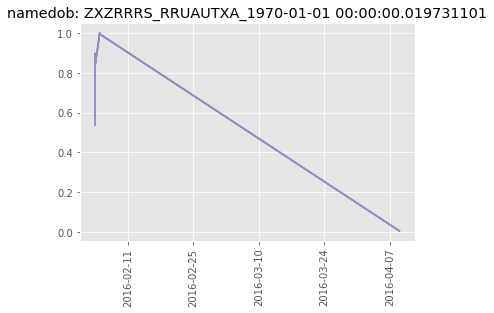

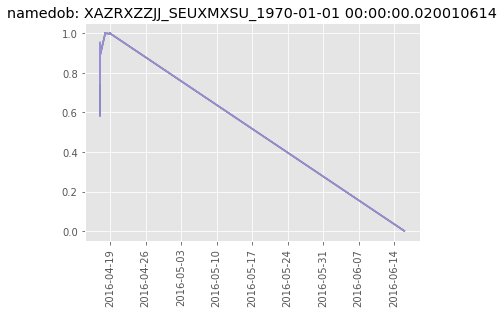

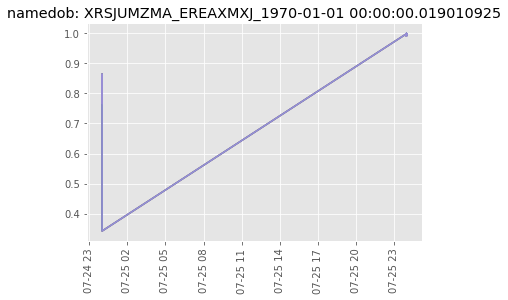

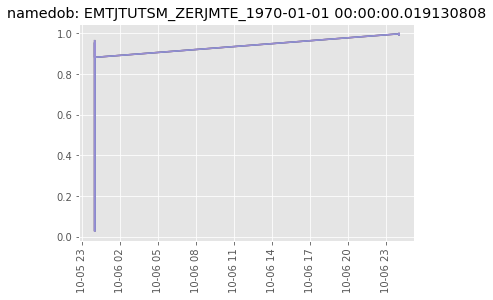

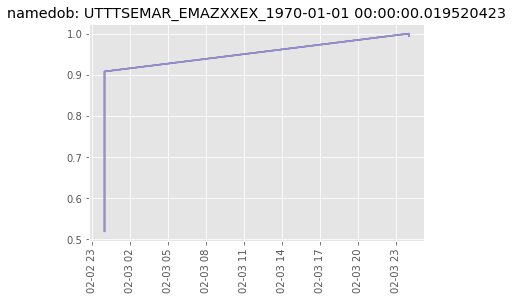

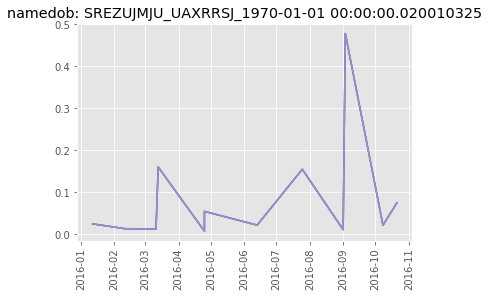

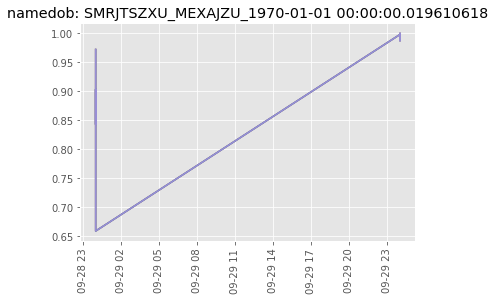

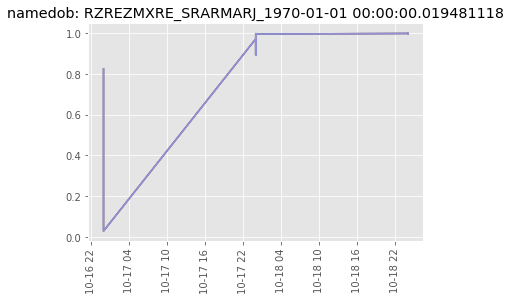

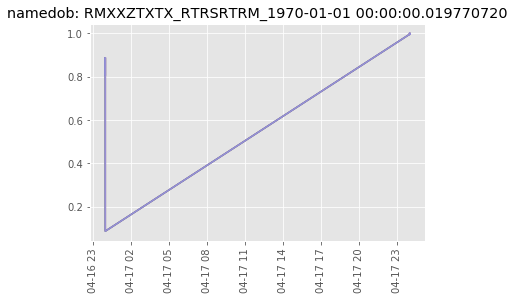

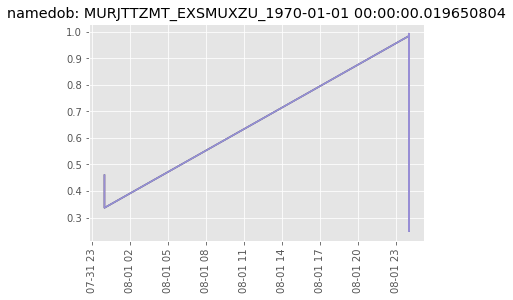

In [309]:
# most frequent namedob - fraud score graph
plot_graphs_fraud_score_date(top_namedob_list, 'namedob')

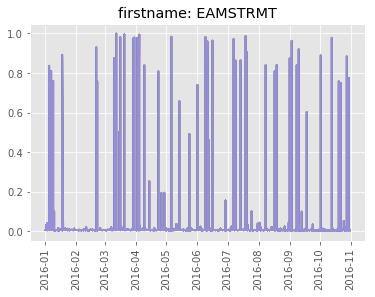

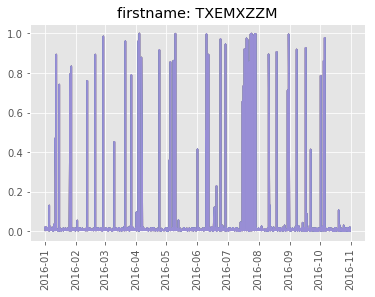

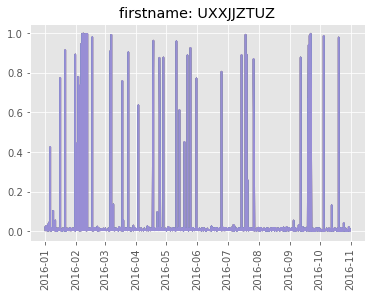

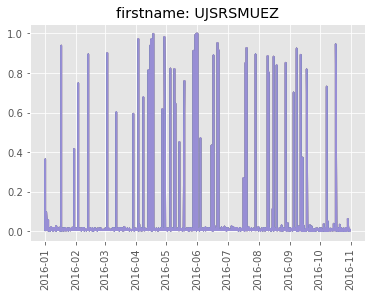

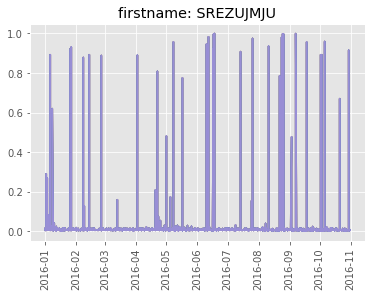

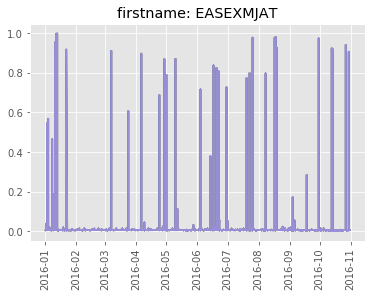

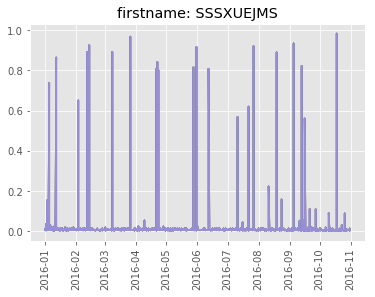

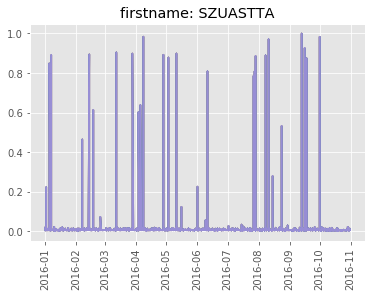

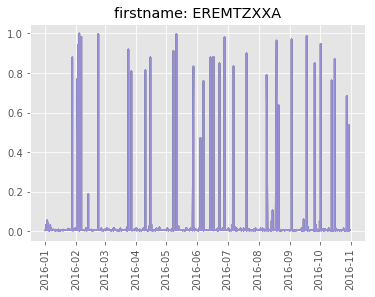

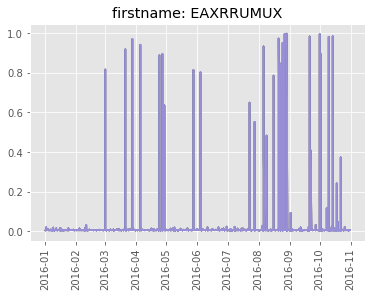

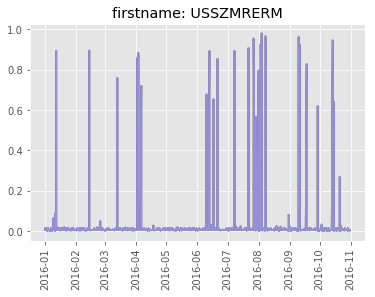

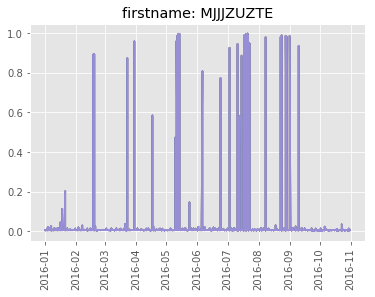

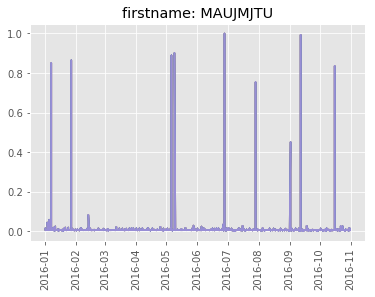

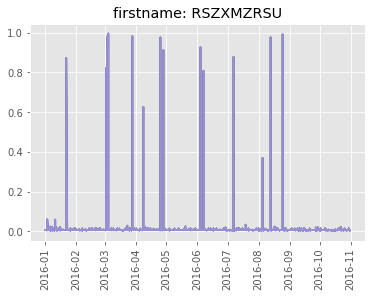

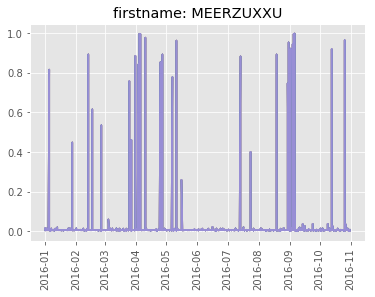

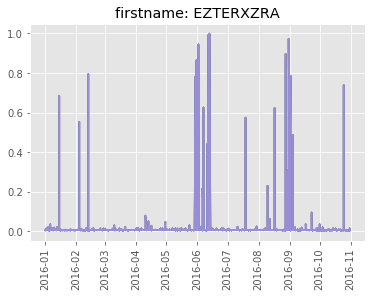

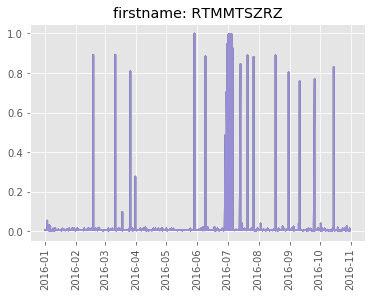

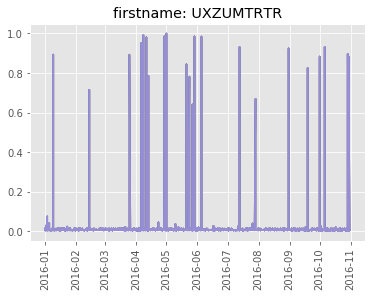

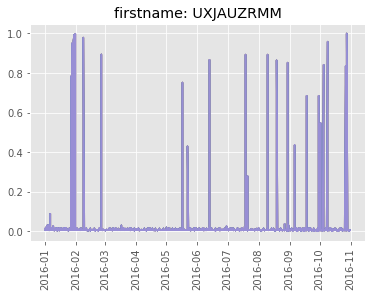

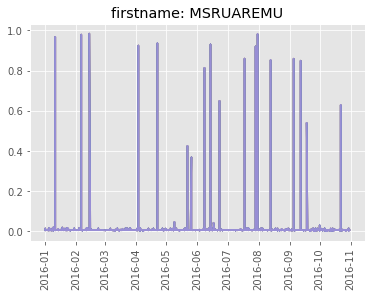

In [310]:
# most frequent firstname - fraud score graph
plot_graphs_fraud_score_date(top_firstname_list, 'firstname')

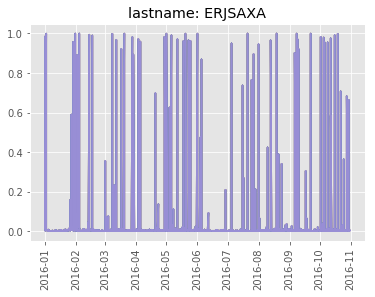

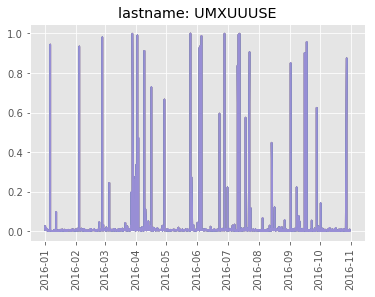

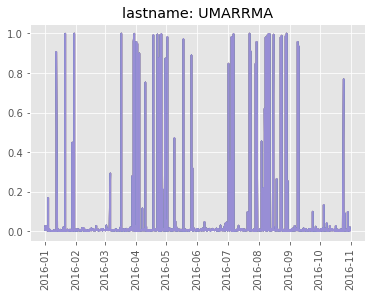

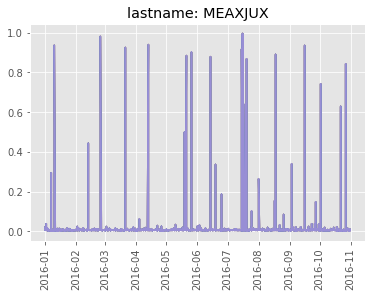

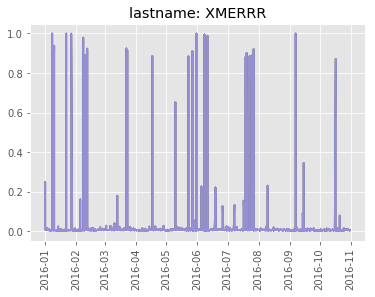

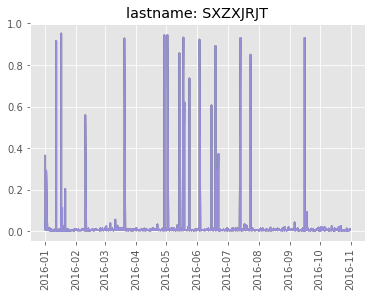

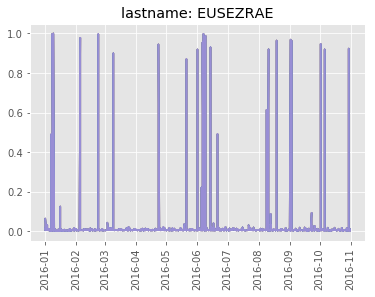

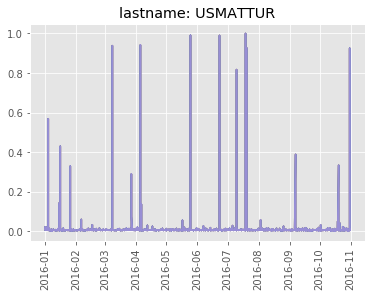

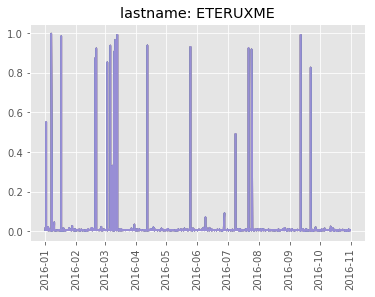

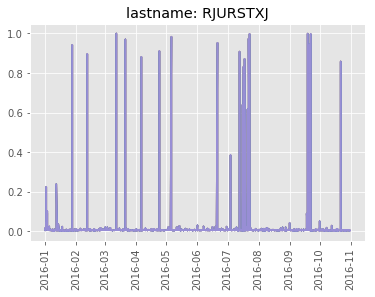

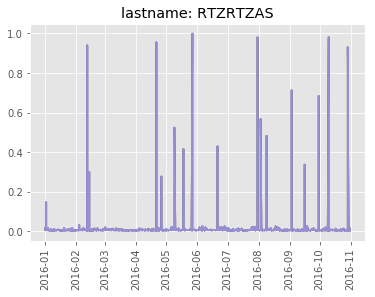

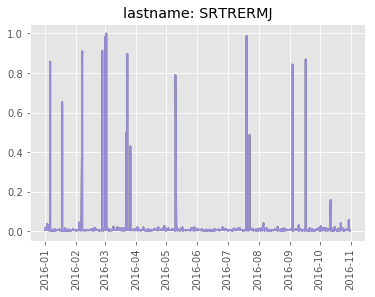

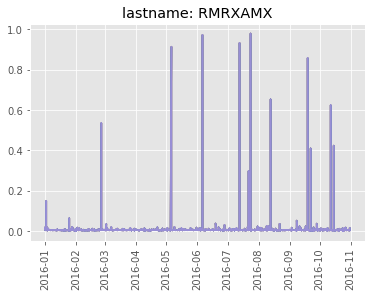

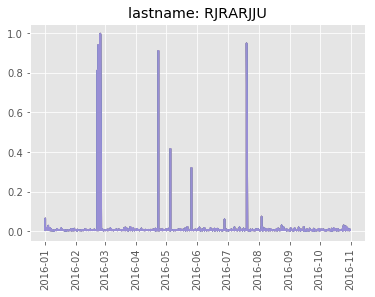

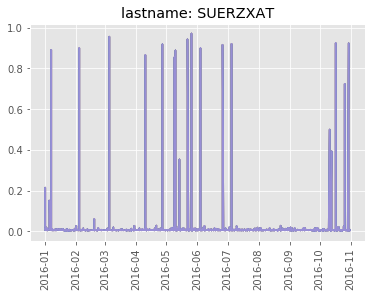

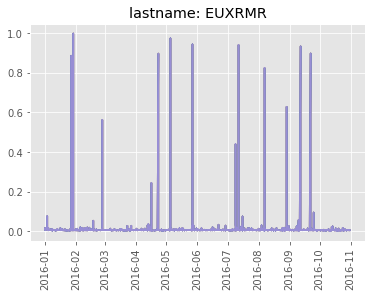

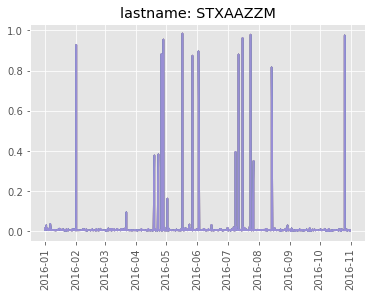

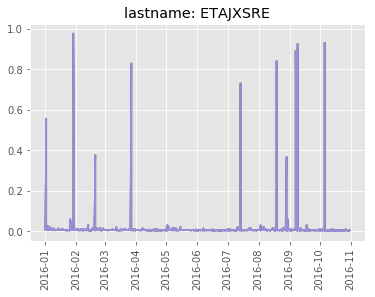

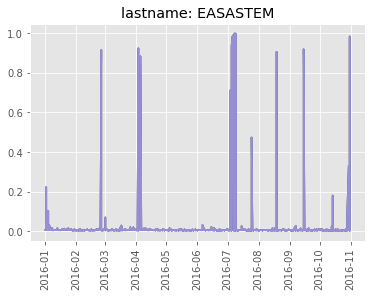

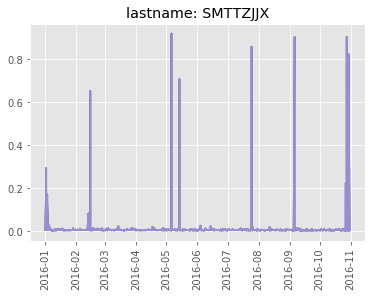

In [311]:
# most frequent lastname - fraud score graph
plot_graphs_fraud_score_date(top_lastname_list, 'lastname')

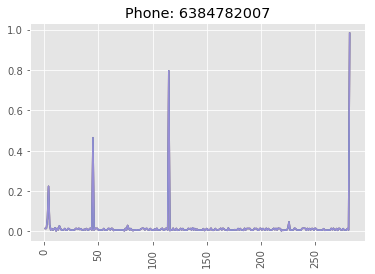

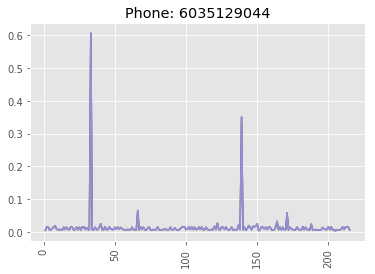

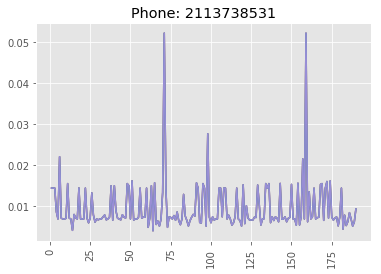

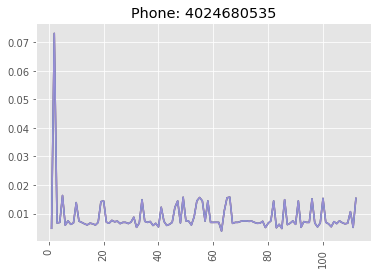

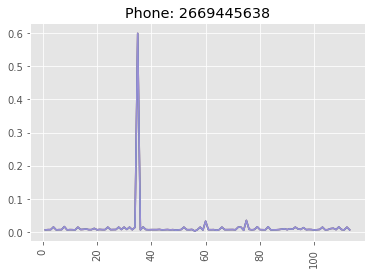

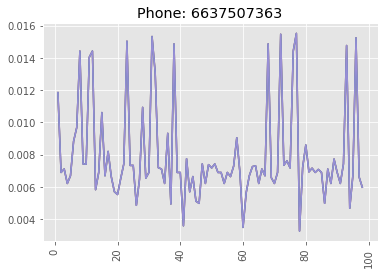

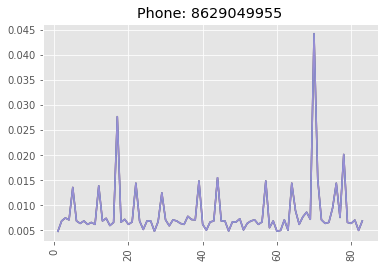

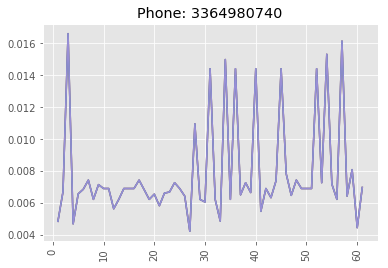

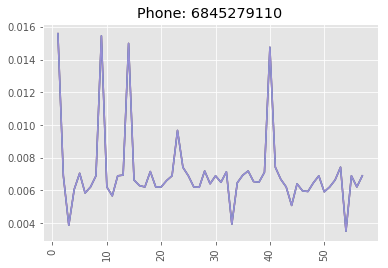

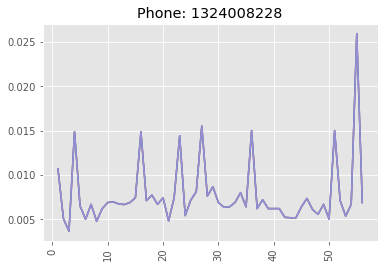

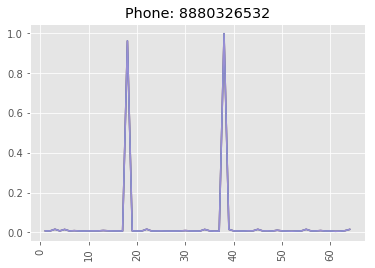

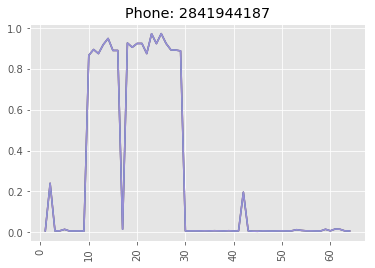

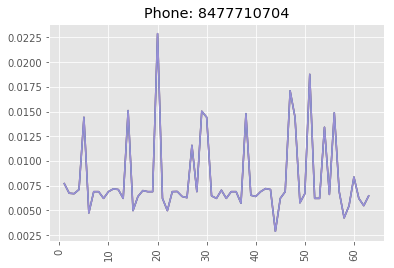

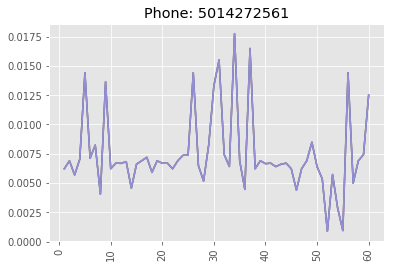

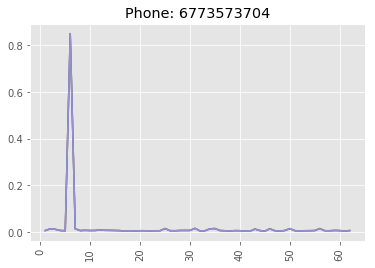

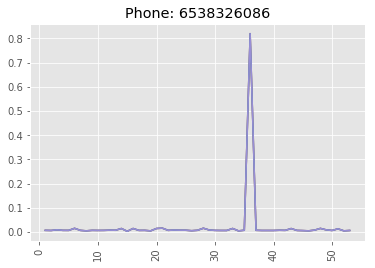

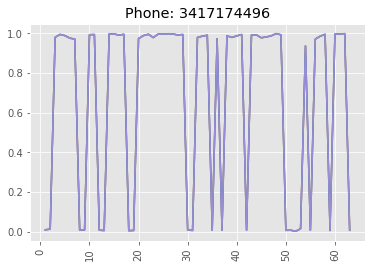

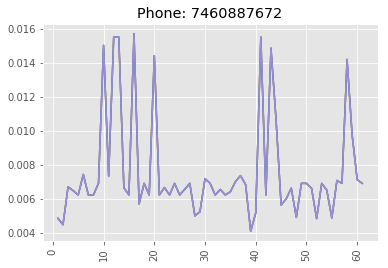

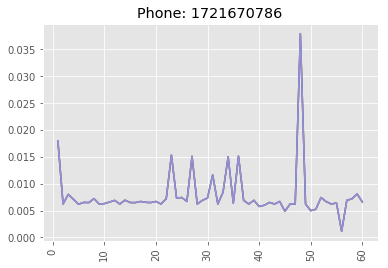

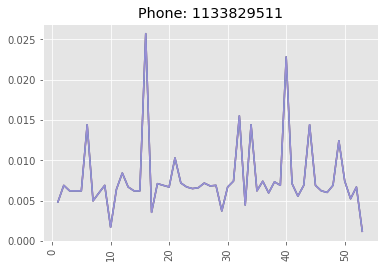

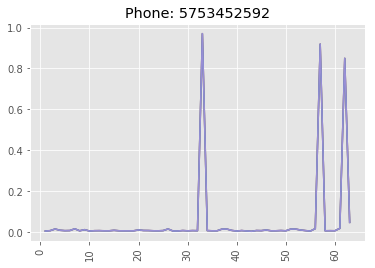

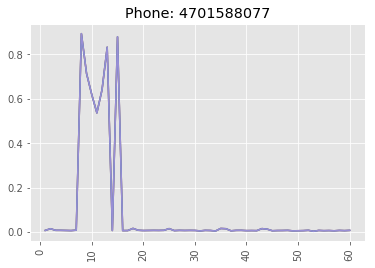

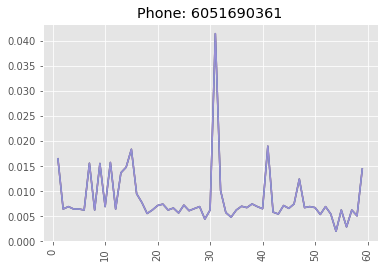

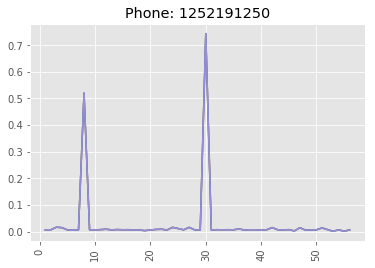

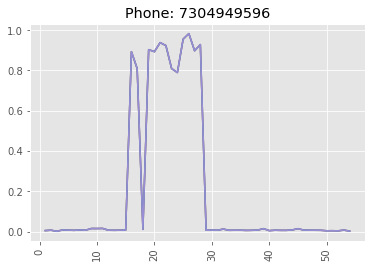

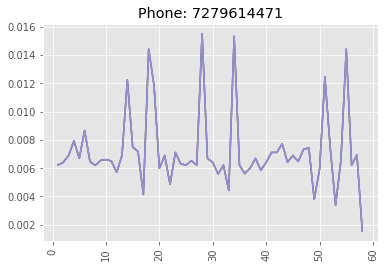

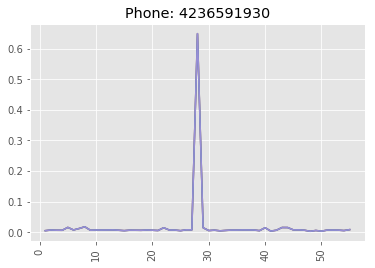

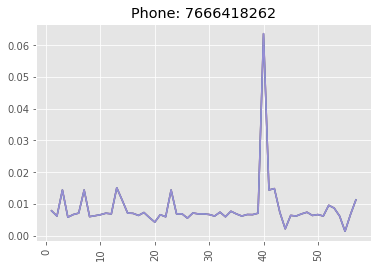

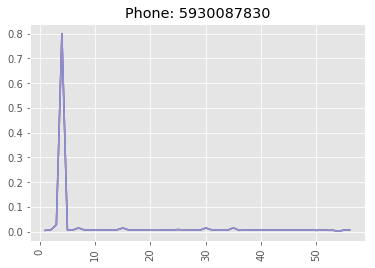

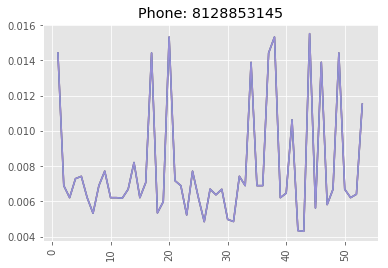

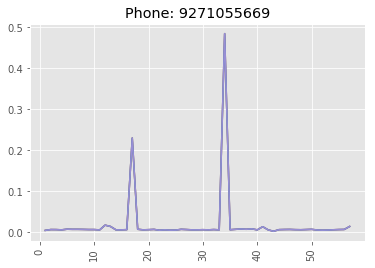

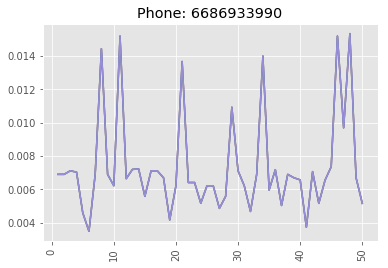

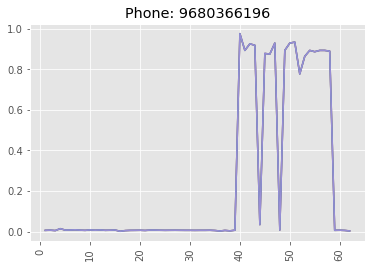

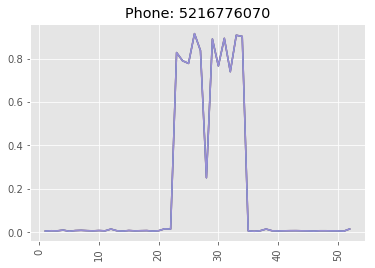

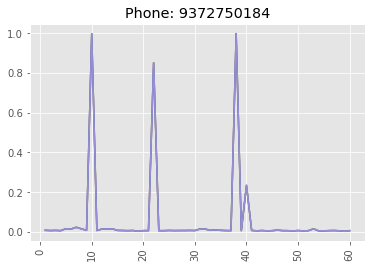

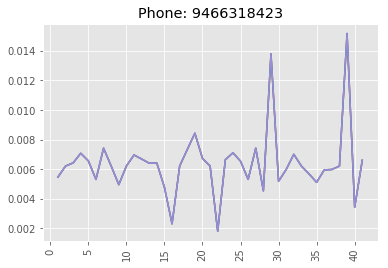

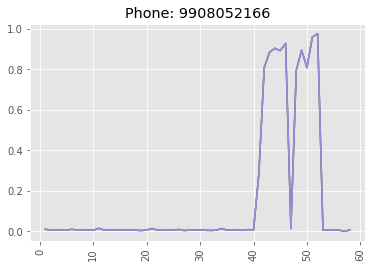

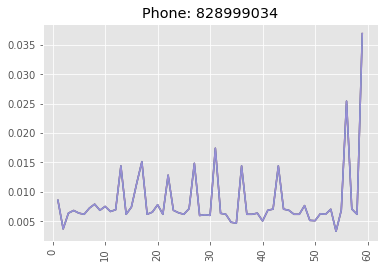

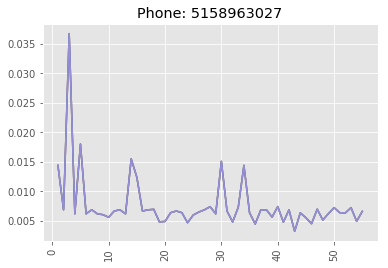

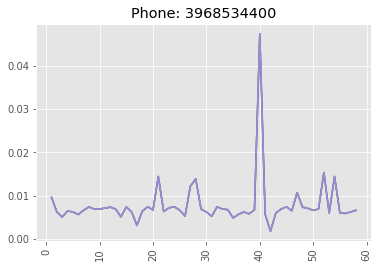

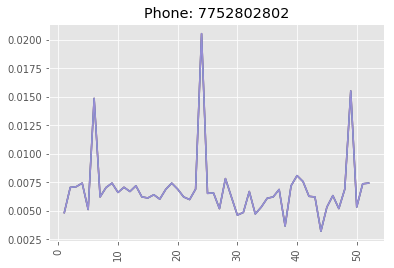

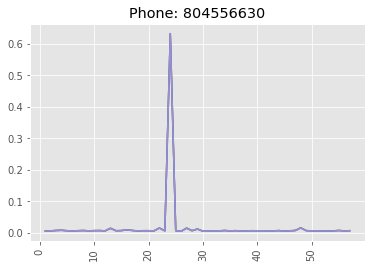

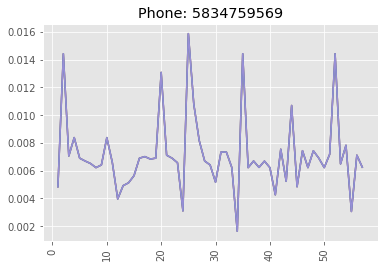

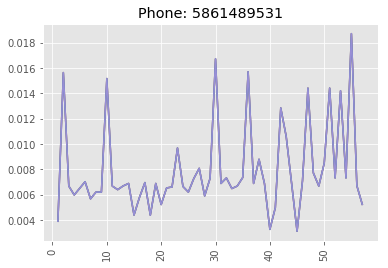

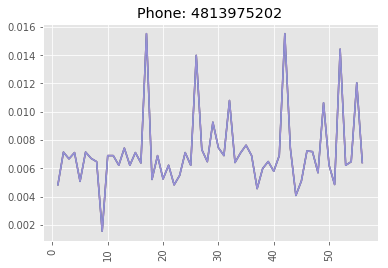

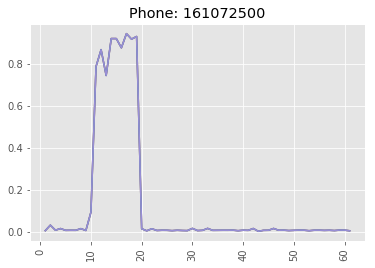

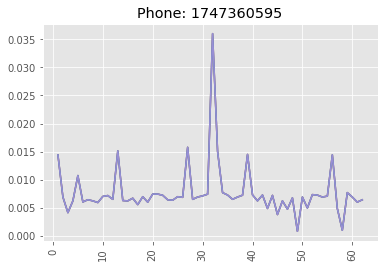

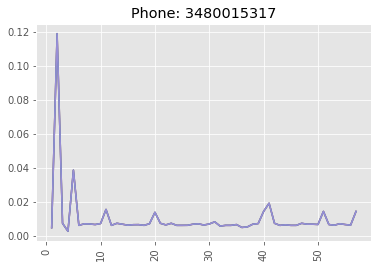

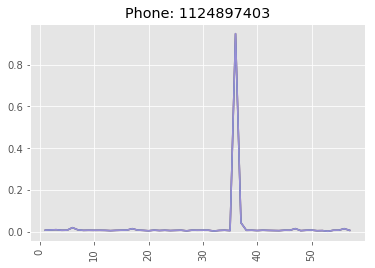

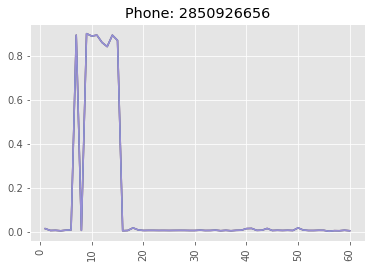

In [285]:
#Fraud score graph - homephone
for phone in top_homephone_list:
    df = newdata.loc[data['homephone'] == phone].sort_values(by = 'date')
    # df['cumsum_var'] = df['fraud_label'].cumsum()
    df['cumcount_var'] = df['only_1'].cumsum()
    # df['fraud_score'] = df['cumsum_var']/df['cumcount_var']
    plt.figure()
    plt.title('Phone: ' + str(phone))
    plt.plot(df['cumcount_var'], df['prob'])
    plt.xticks(rotation =90)

In [313]:
# #Fraud score graph - homephone
# df = newdata.loc[data['homephone'] == 1596700301 ].sort_values(by = 'date')
# df['cumsum_var'] = df['only_1'].cumsum()
# # df['cumsum_var'] = df['fraud_label'].cumsum()
# # df['cumcount_var'] = df['only_1'].cumsum()
# # df['fraud_score'] = df['cumsum_var']/df['cumcount_var'
# plt.plot(df['cumsum_var'], df['prob'])
# plt.xticks(rotation =90)

<h3> Creation of Model Output Table Statitistics </h3>

In [17]:
TrainingDF = pd.DataFrame(PercDataFDRDict["Training"])[['# Records', '# Goods', '# Bads']].rename(columns = {'# Records': "Total # Records", '# Goods': 'Cumulative Good', '# Bads': 'Cumulative Bad'})
TestingDF = pd.DataFrame(PercDataFDRDict["Testing"])[['# Records', '# Goods', '# Bads']].rename(columns = {'# Records': "Total # Records", '# Goods': 'Cumulative Good', '# Bads': 'Cumulative Bad'})
ootDF = pd.DataFrame(PercDataFDRDict["Out of Time"])[['# Records', '# Goods', '# Bads']].rename(columns = {'# Records': "Total # Records", '# Goods': 'Cumulative Good', '# Bads': 'Cumulative Bad'})

In [18]:
TrainingDFcumsum = TrainingDF.cumsum()
TestingDFcumsum = TestingDF.cumsum()
ootDFcumsum = ootDF.cumsum()

In [19]:
TotalGood = {}
TotalBad = {}

for dataX, dataDF, data in [(X_train, Y_train, "Training"), (X_test, Y_test, "Testing"), (OOT_Test_X, OOT_Test_Y, "Out of Time")]:
    TotalGood[data] = dataDF[dataDF['fraud_label'] == 0].shape[0]
    TotalBad[data] = dataDF[dataDF['fraud_label'] == 1].shape[0]
    

In [20]:
for dataname, df in [("Training", TrainingDFcumsum), ("Testing", TestingDFcumsum), ("Out of Time", ootDFcumsum)]:
    df["% Good"] = round(df['Cumulative Good'].apply(lambda x: x*100/TotalGood[dataname]),2)
    df['% Bad'] = round(df['Cumulative Bad'].apply(lambda x: x*100/TotalBad[dataname]),2)
    df['KS'] = round((df['% Bad'] - df["% Good"]),2)
    df['FPR'] = round((df['Cumulative Good']/df['Cumulative Bad']),2)

In [21]:
ActualTrainingDF = pd.DataFrame(PercDataFDRDict["Training"])
ActualTestingDF = pd.DataFrame(PercDataFDRDict["Testing"])
ActualOOTDF = pd.DataFrame(PercDataFDRDict["Out of Time"])

In [22]:
ActualOOTDF

Population Bin %  # Records  # Goods  # Bads  % Goods  % Bads
0                1.0       1665      507    1158    30.45   69.55
1                2.0       1665     1576      89    94.65    5.35
2                3.0       1665     1636      29    98.26    1.74
3                4.0       1665     1638      27    98.38    1.62
4                5.0       1665     1629      36    97.84    2.16
5                6.0       1665     1642      23    98.62    1.38
6                7.0       1665     1646      19    98.86    1.14
7                8.0       1665     1654      11    99.34    0.66
8                9.0       1665     1655      10    99.40    0.60
9               10.0       1665     1648      17    98.98    1.02
10              11.0       1665     1656       9    99.46    0.54
11              12.0       1665     1653      12    99.28    0.72
12              13.0       1665     1644      21    98.74    1.26
13              14.0       1665     1661       4    99.76    0.24
14              15.0       1665     1657       8    99.52    0.48
15              16.0       1665     1642      23    98.62    1.38
16              17.0       1665     1658       7    99.58    0.42
17              18.0       1665     1657       8    99.52    0.48
18              19.0       1665     1646      19    98.86    1.14
19              20.0       1665     1657       8    99.52    0.48
20              21.0       1665     1660       5    99.70    0.30
21              22.0       1665     1654      11    99.34    0.66
22              23.0       1665     1653      12    99.28    0.72
23              24.0       1665     1649      16    99.04    0.96
24              25.0       1665     1644      21    98.74    1.26
25              26.0       1665     1652      13    99.22    0.78
26              27.0       1665     1654      11    99.34    0.66
27              28.0       1665     1655      10    99.40    0.60
28              29.0       1665     1653      12    99.28    0.72
29              30.0       1665     1649      16    99.04    0.96
..               ...        ...      ...     ...      ...     ...
70              71.0       1665     1655      10    99.40    0.60
71              72.0       1665     1662       3    99.82    0.18
72              73.0       1665     1657       8    99.52    0.48
73              74.0       1665     1655      10    99.40    0.60
74              75.0       1665     1656       9    99.46    0.54
75              76.0       1665     1653      12    99.28    0.72
76              77.0       1665     1654      11    99.34    0.66
77              78.0       1665     1653      12    99.28    0.72
78              79.0       1665     1654      11    99.34    0.66
79              80.0       1665     1661       4    99.76    0.24
80              81.0       1665     1658       7    99.58    0.42
81              82.0       1665     1654      11    99.34    0.66
82              83.0       1665     1658       7    99.58    0.42
83              84.0       1665     1657       8    99.52    0.48
84              85.0       1665     1660       5    99.70    0.30
85              86.0       1665     1656       9    99.46    0.54
86              87.0       1665     1654      11    99.34    0.66
87              88.0       1665     1651      14    99.16    0.84
88              89.0       1665     1655      10    99.40    0.60
89              90.0       1665     1656       9    99.46    0.54
90              91.0       1665     1654      11    99.34    0.66
91              92.0       1665     1655      10    99.40    0.60
92              93.0       1665     1657       8    99.52    0.48
93              94.0       1665     1655      10    99.40    0.60
94              95.0       1665     1652      13    99.22    0.78
95              96.0       1665     1655      10    99.40    0.60
96              97.0       1665     1655      10    99.40    0.60
97              98.0       1665     1651      14    99.16    0.84
98              99.0       1665     1657    

In [23]:
ootDFcumsum

Total # Records  Cumulative Good  Cumulative Bad  % Good   % Bad     KS  \
0              1665              507            1158    0.31   48.53  48.22   
1              3330             2083            1247    1.27   52.26  50.99   
2              4995             3719            1276    2.27   53.48  51.21   
3              6660             5357            1303    3.26   54.61  51.35   
4              8325             6986            1339    4.26   56.12  51.86   
5              9990             8628            1362    5.26   57.08  51.82   
6             11655            10274            1381    6.26   57.88  51.62   
7             13320            11928            1392    7.27   58.34  51.07   
8             14985            13583            1402    8.28   58.76  50.48   
9             16650            15231            1419    9.28   59.47  50.19   
10            18315            16887            1428   10.29   59.85  49.56   
11            19980            18540            1440   11.30   60.35  49.05   
12            21645            20184            1461   12.30   61.23  48.93   
13            23310            21845            1465   13.31   61.40  48.09   
14            24975            23502            1473   14.32   61.74  47.42   
15            26640            25144            1496   15.32   62.70  47.38   
16            28305            26802            1503   16.33   62.99  46.66   
17            29970            28459            1511   17.34   63.33  45.99   
18            31635            30105            1530   18.34   64.12  45.78   
19            33300            31762            1538   19.35   64.46  45.11   
20            34965            33422            1543   20.37   64.67  44.30   
21            36630            35076            1554   21.37   65.13  43.76   
22            38295            36729            1566   22.38   65.63  43.25   
23            39960            38378            1582   23.39   66.30  42.91   
24            41625            40022            1603   24.39   67.18  42.79   
25            43290            41674            1616   25.39   67.73  42.34   
26            44955            43328            1627   26.40   68.19  41.79   
27            46620            44983            1637   27.41   68.61  41.20   
28            48285            46636            1649   28.42   69.11  40.69   
29            49950            48285            1665   29.42   69.78  40.36   
..              ...              ...             ...     ...     ...    ...   
70           118215           116108            2107   70.75   88.31  17.56   
71           119880           117770            2110   71.76   88.43  16.67   
72           121545           119427            2118   72.77   88.77  16.00   
73           123210           121082            2128   73.78   89.19  15.41   
74           124875           122738            2137   74.79   89.56  14.77   
75           126540           124391            2149   75.80   90.07  14.27   
76           128205           126045            2160   76.81   90.53  13.72   
77           129870           127698            2172   77.81   91.03  13.22   
78           131535           129352            2183   78.82   91.49  12.67   
79           133200           131013            2187   79.83   91.66  11.83   
80           134865           132671            2194   80.84   91.95  11.11   
81           136530           134325            2205   81.85   92.41  10.56   
82           138195           135983            2212   82.86   92.71   9.85   
83           139860           137640            2220   83.87   93.04   9.17   
84           141525           139300            2225   84.88   93.25   8.37   
85           143190           140956            2234   85.89   93.63   7.74   
86           144855           142610            2245   86.90   94.09   7.19   
87           146520           144261            2259   87.91   94.68   6.77   
88           148185           145916            2269  

In [24]:
OverallTrainingStatistics = pd.concat([ActualTrainingDF, TrainingDFcumsum], axis = 1)
OverallTestingStatistics = pd.concat([ActualTestingDF, TestingDFcumsum], axis = 1)
OverallOOTStatistics = pd.concat([ActualOOTDF, ootDFcumsum], axis = 1)

In [199]:
for table_name, table in [("OverallTrainingStatistics", OverallTrainingStatistics), ("OverallTestingStatistics",OverallTestingStatistics),("OverallOOTStatistics",OverallOOTStatistics)]:
    table.to_excel("ApplicationsTableStatistics.xlsx", sheet_name = table_name)
    
with pd.ExcelWriter('ApplicationsTableStatistics.xlsx') as writer:
    for table_name, table in [("OverallTrainingStatistics", OverallTrainingStatistics), ("OverallTestingStatistics",OverallTestingStatistics),("OverallOOTStatistics",OverallOOTStatistics)]:
        table.to_excel(writer, sheet_name = table_name)    

In [25]:
for dataX, dataDF, data in [(X_train, Y_train, "Training"), (X_test, Y_test, "Testing"), (OOT_Test_X, OOT_Test_Y, "Out of Time")]: 
    print (data)
    print ("# records:", dataX.shape[0])
    print ("# Goods:", dataDF[dataDF['fraud_label'] == 0].shape[0])
    print ("# Bads:", dataDF[dataDF['fraud_label'] == 1].shape[0])
    print ('Fraud Rate:', dataDF[dataDF['fraud_label'] == 1].shape[0]/(dataDF[dataDF['fraud_label'] == 0].shape[0] + dataDF[dataDF['fraud_label'] == 1].shape[0]))
    

Training
# records: 583454
# Goods: 575049
# Bads: 8405
Fraud Rate: 0.014405591529066559
Testing
# records: 250053
# Goods: 246451
# Bads: 3602
Fraud Rate: 0.014404946151415899
Out of Time
# records: 166493
# Goods: 164107
# Bads: 2386
Fraud Rate: 0.014330932832010956


In [26]:
OverallOOTStatistics

Population Bin %  # Records  # Goods  # Bads  % Goods  % Bads  \
0                1.0       1665      507    1158    30.45   69.55   
1                2.0       1665     1576      89    94.65    5.35   
2                3.0       1665     1636      29    98.26    1.74   
3                4.0       1665     1638      27    98.38    1.62   
4                5.0       1665     1629      36    97.84    2.16   
5                6.0       1665     1642      23    98.62    1.38   
6                7.0       1665     1646      19    98.86    1.14   
7                8.0       1665     1654      11    99.34    0.66   
8                9.0       1665     1655      10    99.40    0.60   
9               10.0       1665     1648      17    98.98    1.02   
10              11.0       1665     1656       9    99.46    0.54   
11              12.0       1665     1653      12    99.28    0.72   
12              13.0       1665     1644      21    98.74    1.26   
13              14.0       1665     1661       4    99.76    0.24   
14              15.0       1665     1657       8    99.52    0.48   
15              16.0       1665     1642      23    98.62    1.38   
16              17.0       1665     1658       7    99.58    0.42   
17              18.0       1665     1657       8    99.52    0.48   
18              19.0       1665     1646      19    98.86    1.14   
19              20.0       1665     1657       8    99.52    0.48   
20              21.0       1665     1660       5    99.70    0.30   
21              22.0       1665     1654      11    99.34    0.66   
22              23.0       1665     1653      12    99.28    0.72   
23              24.0       1665     1649      16    99.04    0.96   
24              25.0       1665     1644      21    98.74    1.26   
25              26.0       1665     1652      13    99.22    0.78   
26              27.0       1665     1654      11    99.34    0.66   
27              28.0       1665     1655      10    99.40    0.60   
28              29.0       1665     1653      12    99.28    0.72   
29              30.0       1665     1649      16    99.04    0.96   
..               ...        ...      ...     ...      ...     ...   
70              71.0       1665     1655      10    99.40    0.60   
71              72.0       1665     1662       3    99.82    0.18   
72              73.0       1665     1657       8    99.52    0.48   
73              74.0       1665     1655      10    99.40    0.60   
74              75.0       1665     1656       9    99.46    0.54   
75              76.0       1665     1653      12    99.28    0.72   
76              77.0       1665     1654      11    99.34    0.66   
77              78.0       1665     1653      12    99.28    0.72   
78              79.0       1665     1654      11    99.34    0.66   
79              80.0       1665     1661       4    99.76    0.24   
80              81.0       1665     1658       7    99.58    0.42   
81              82.0       1665     1654      11    99.34    0.66   
82              83.0       1665     1658       7    99.58    0.42   
83              84.0       1665     1657       8    99.52    0.48   
84              85.0       1665     1660       5    99.70    0.30   
85              86.0       1665     1656       9    99.46    0.54   
86              87.0       1665     1654      11    99.34    0.66   
87              88.0       1665     1651      14    99.16    0.84   
88              89.0       1665     1655      10    99.40    0.60   
89              90.0       1665     1656       9    99.46    0.54   
90              91.0       1665     1654      11    99.34    0.66   
91              92.0       1665     1655      10    99.40    0.60   
92              93.0       1665     1657       8    99.52    0.48   
93              94.0       1665     1655      10    99.40    0.60   
94              95.0       1665     1652      13    99.22    0.78   
95              96.0       1665     1655      10    99.40    0.60   
96